In [1]:
cd ../TileEM/

/Users/dorislee/Desktop/Research/seg/crowd-seg/analysis/TileEM


In [2]:
%pylab inline
%load_ext autoreload
%autoreload 2
from TileEM_plot_toolbox import *
from scatter_toolbox import * 

Populating the interactive namespace from numpy and matplotlib


In [3]:
cd final_all_tiles/

/Users/dorislee/Desktop/Research/seg/crowd-seg/analysis/TileEM/final_all_tiles


In [146]:
df = pd.read_csv("new_all_tile_combo_metric_snowball.csv",index_col=0)

In [147]:
df = df.drop("Average gamma value",axis=1)
df = df.drop("Total gamma value",axis=1)

In [148]:
keys = ['objid', 'T prime', 'pTprimeGTLSA[Athres>1]', 'pTprimeGTLSA[Athres>5]','pTprimeGTLSA[Athres>10]','AreaTprimeScore','pTprimeGTLSA[Athres>90%]', u'pTprimeGTLSA[Athres>95%]','pTprimeGTLSA[Athres>99%]', 'Precision', 'Recall']

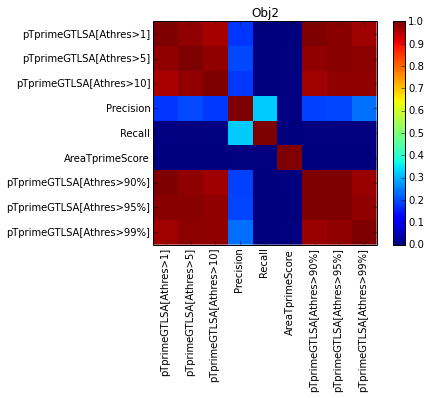

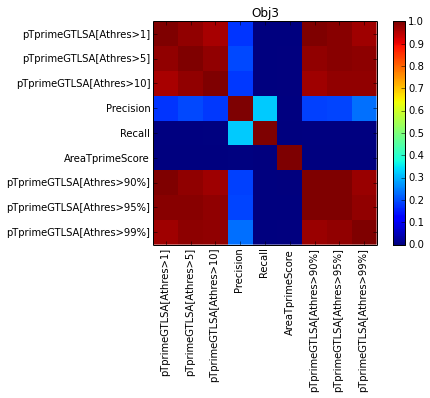

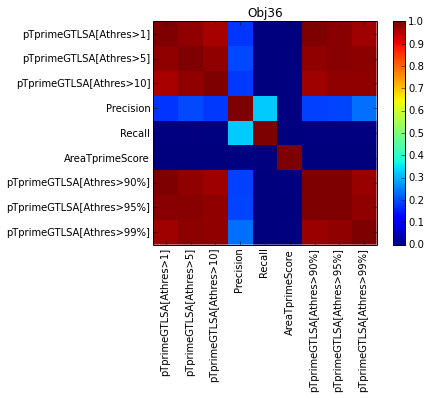

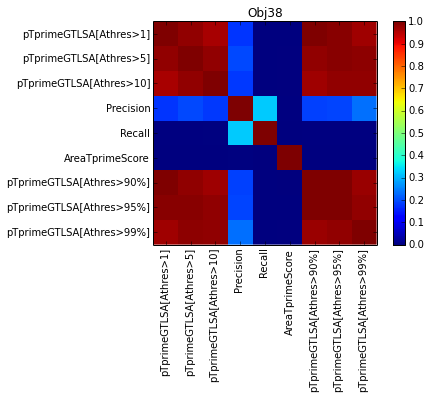

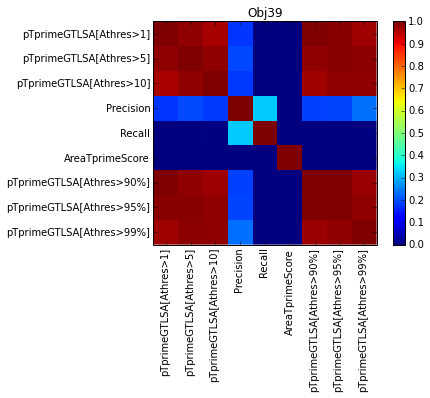

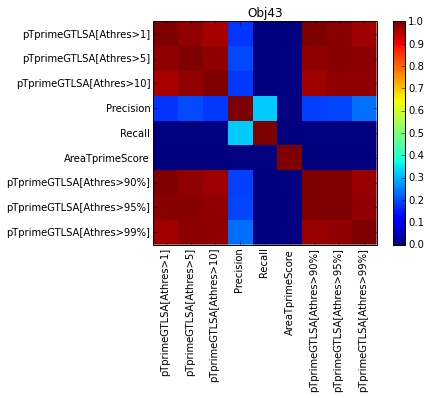

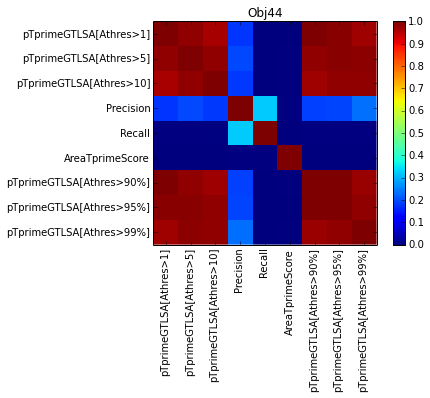

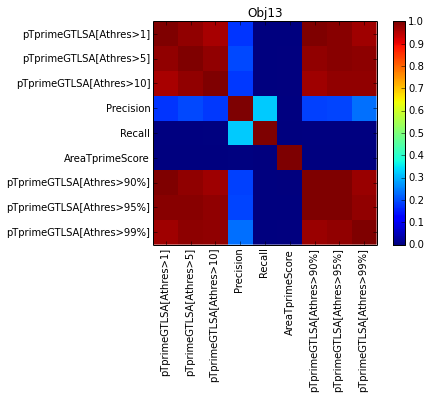

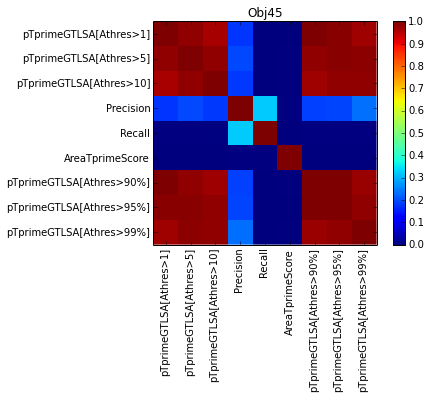

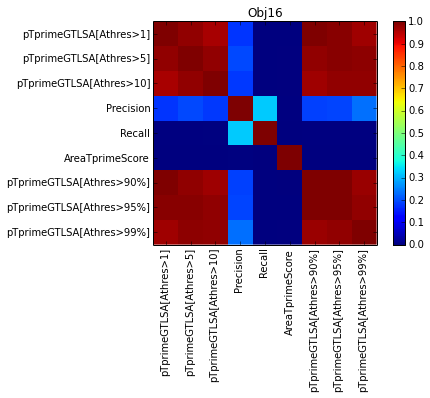

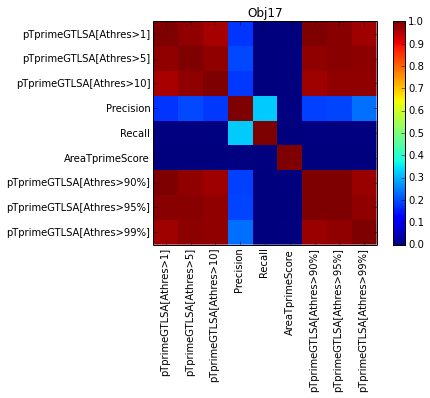

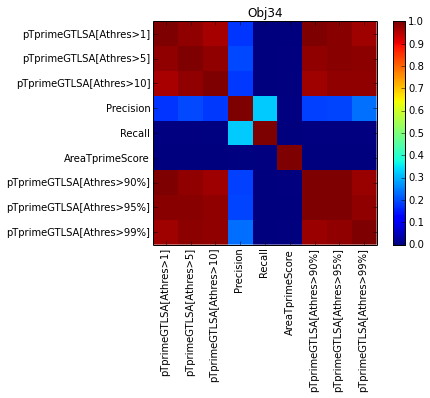

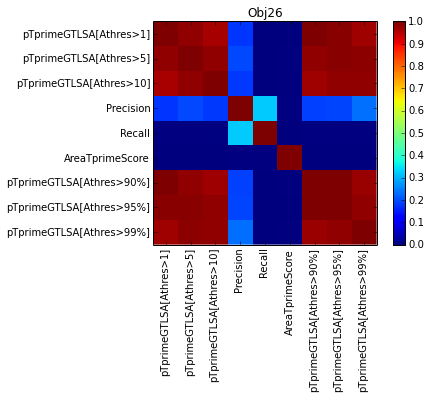

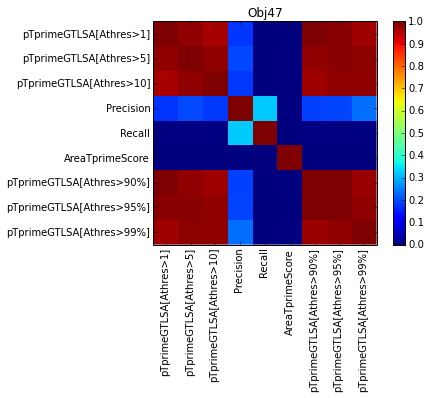

In [149]:
for objid in list(set(df.objid)):
    df_obj = df[df["objid"]==objid]
    keys= df.keys()[6:]
    correlation = df[keys].corr('pearson')
    #correlation

    ticks=np.arange(0,shape(correlation)[0])
    plt.figure()
    plt.title("Obj{}".format(objid))
    plt.imshow(correlation.as_matrix(),interpolation="None")
    plt.xticks(ticks, keys, rotation='vertical')
    plt.yticks(ticks, keys, rotation='horizontal')
    plt.colorbar()
    plt.clim(0,1)

In [133]:
df = df.reindex_axis([u'objid', u'T prime', u'Total Votes', u'Average Votes', u'Total area',
       u'Average area', u'pTprimeGTLSA[Athres>1]', u'pTprimeGTLSA[Athres>5]',
       u'pTprimeGTLSA[Athres>10]',  u'AreaTprimeScore',
       u'pTprimeGTLSA[Athres>90%]', u'pTprimeGTLSA[Athres>95%]',
       u'pTprimeGTLSA[Athres>99%]',u'Precision', u'Recall'], axis=1)

In [134]:
df =df[df["Precision"]!=-1]
df =df[df["Recall"]!=-1]

In [135]:
# df["likelihoodGTLSA[Athres>1]"]=e**df["pTprimeGTLSA[Athres>1]"]
# df["likelihoodGTLSA[Athres>5]"]=e**df["pTprimeGTLSA[Athres>5]"]
# df["likelihoodGTLSA[Athres>10]"]=e**df["pTprimeGTLSA[Athres>10]"]

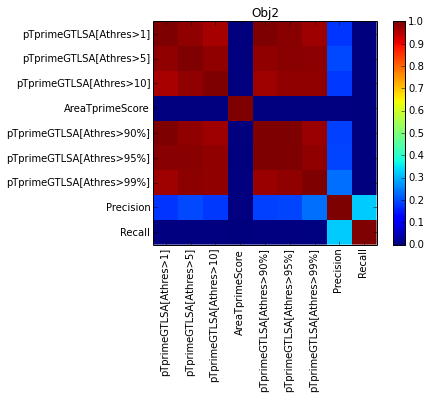

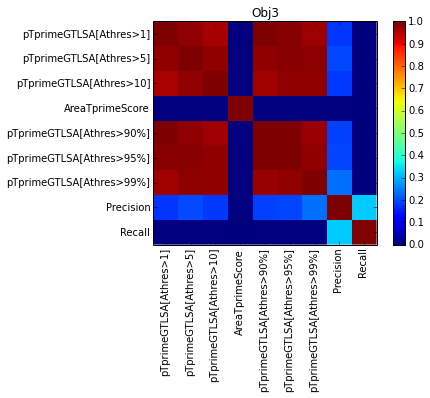

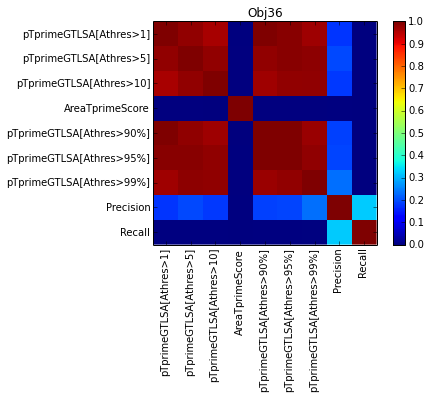

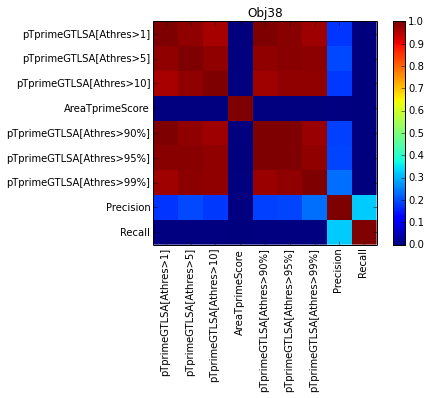

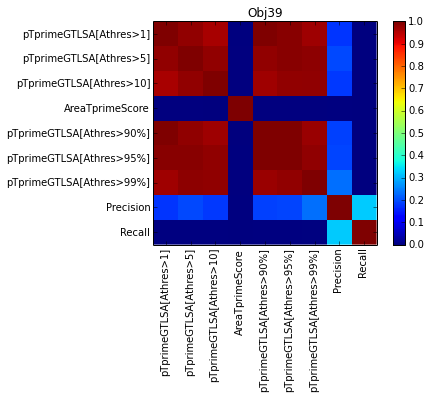

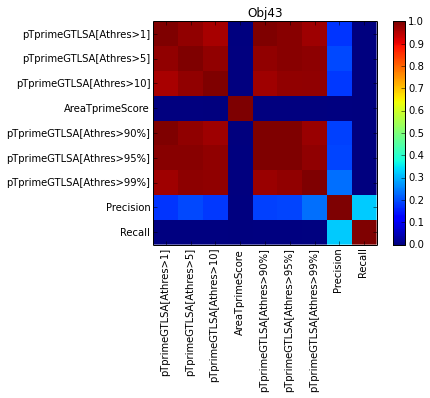

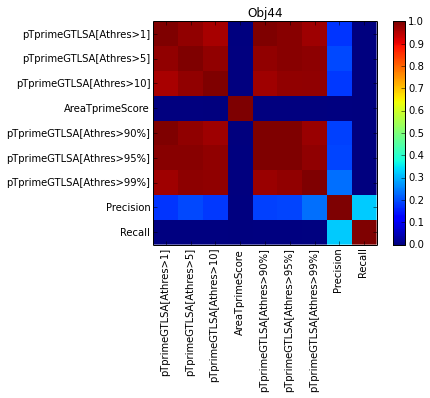

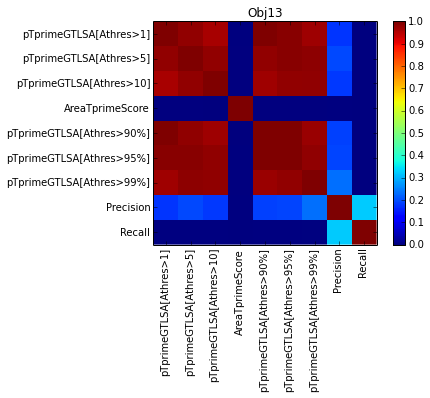

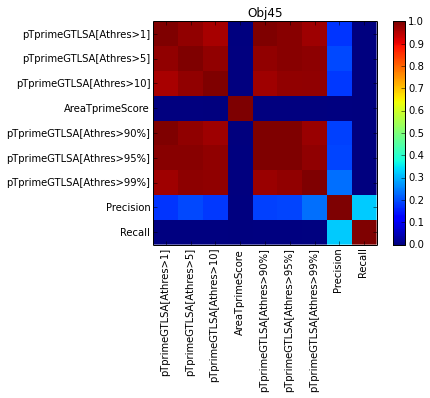

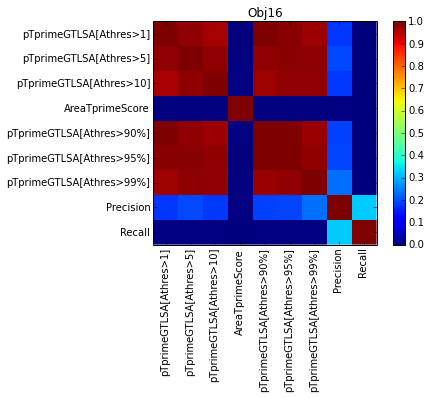

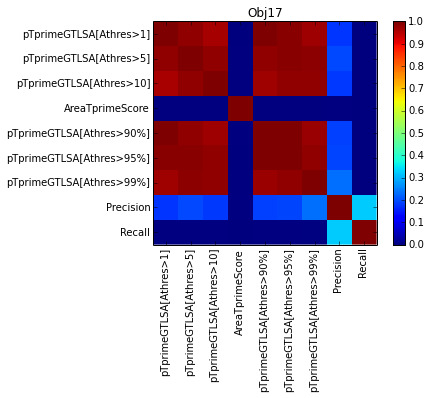

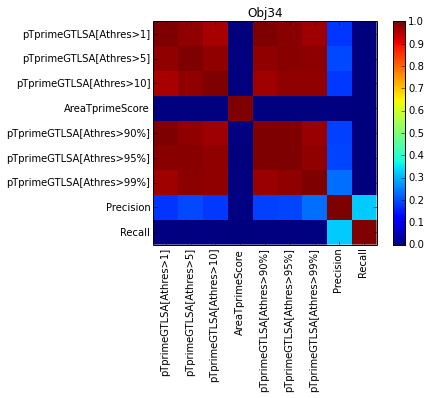

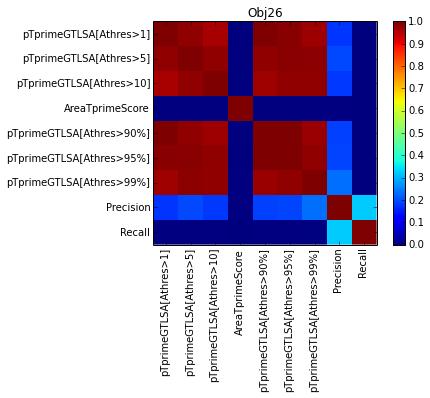

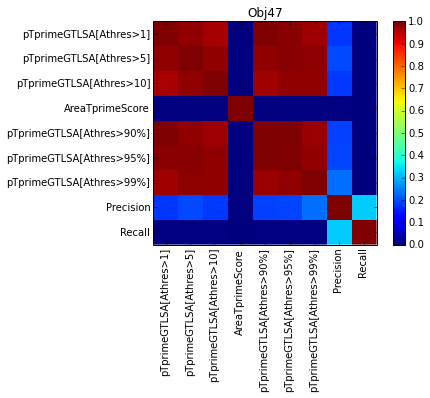

In [136]:
for objid in list(set(df.objid)):
    df_obj = df[df["objid"]==objid]
    keys= df.keys()[6:]
    correlation = df[keys].corr('pearson')
    #correlation

    ticks=np.arange(0,shape(correlation)[0])
    plt.figure()
    plt.title("Obj{}".format(objid))
    plt.imshow(correlation.as_matrix(),interpolation="None")
    plt.xticks(ticks, keys, rotation='vertical')
    plt.yticks(ticks, keys, rotation='horizontal')
    plt.colorbar()
    plt.clim(0,1)

the area-weighted T' score seems to be strongly correlated with Recall whereas p(T') done on area percentile threshold is strongly correlated with precision. '

---------------------------------------------
Regression x=['pTprimeGTLSA[Athres>95%]'];y=['Precision']
Coefficients:  [[ 0.00010458]]
Mean squared error: 0.00
R^2: 0.92
---------------------------------------------
Regression x=['pTprimeGTLSA[Athres>95%]'];y=['Precision']
Coefficients:  [[ 0.00015683]]
Mean squared error: 0.00
R^2: 0.76
---------------------------------------------
Regression x=['pTprimeGTLSA[Athres>95%]'];y=['Precision']
Coefficients:  [[  5.76013137e-05]]
Mean squared error: 0.00
R^2: -0.17
---------------------------------------------
Regression x=['pTprimeGTLSA[Athres>95%]'];y=['Precision']
Coefficients:  [[  1.34610008e-05]]
Mean squared error: 0.00
R^2: 0.67
---------------------------------------------
Regression x=['pTprimeGTLSA[Athres>95%]'];y=['Precision']
Coefficients:  [[ 0.00053737]]
Mean squared error: 0.02
R^2: 0.26
---------------------------------------------
Regression x=['pTprimeGTLSA[Athres>95%]'];y=['Precision']
Coefficients:  [[  2.90332052e-05]]

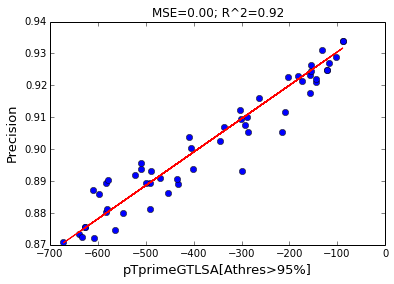

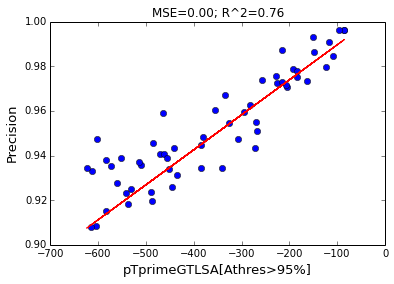

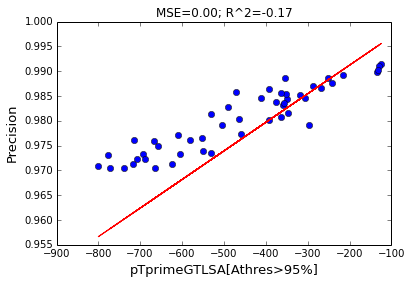

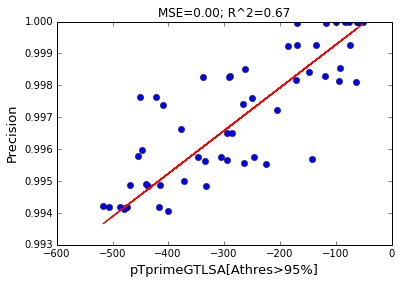

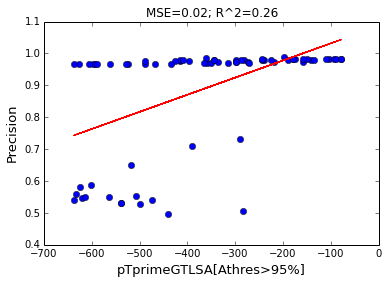

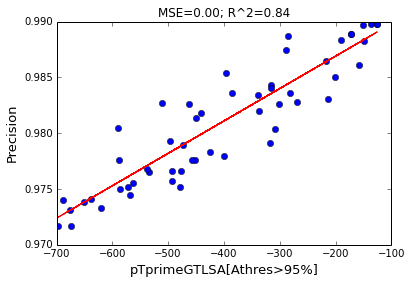

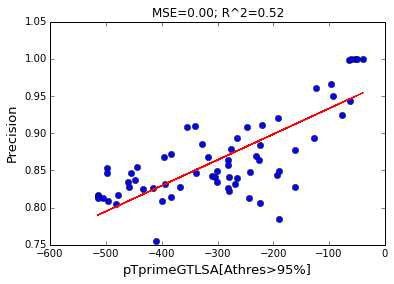

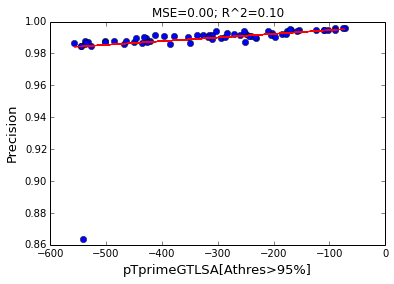

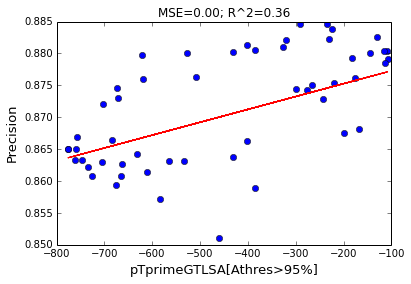

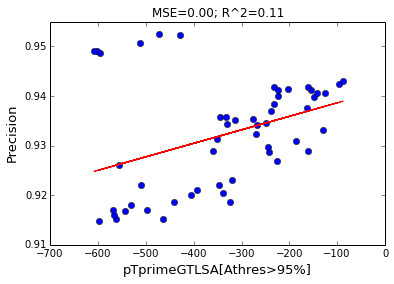

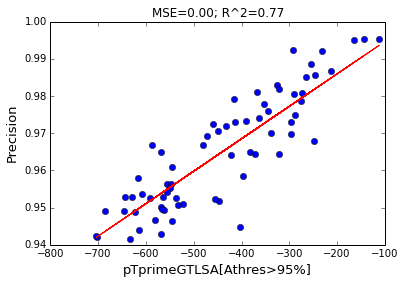

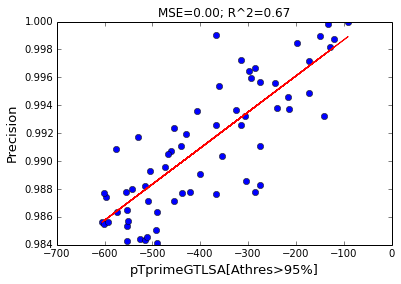

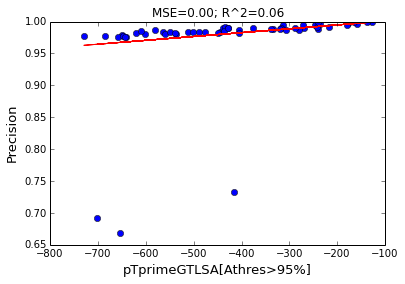

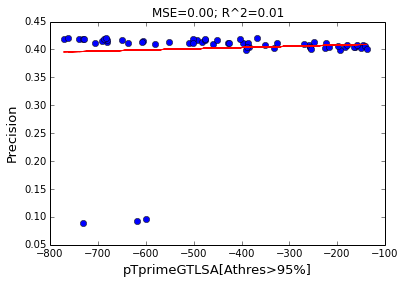

In [140]:
for objid in list(set(df.objid)):
    df_obj = df[df["objid"]==objid]
    x_attr = ["pTprimeGTLSA[Athres>95%]"]
    y_attr = ["Precision"]
    regression_results(df_obj,x_attr,y_attr,PLOT=True)

---------------------------------------------
Regression x=['AreaTprimeScore'];y=['Recall']
Coefficients:  [[ 0.00019069]]
Mean squared error: 0.00
R^2: 0.39
---------------------------------------------
Regression x=['AreaTprimeScore'];y=['Recall']
Coefficients:  [[ 0.00011252]]
Mean squared error: 0.00
R^2: 0.66
---------------------------------------------
Regression x=['AreaTprimeScore'];y=['Recall']
Coefficients:  [[  1.12949983e-05]]
Mean squared error: 0.01
R^2: -0.01
---------------------------------------------
Regression x=['AreaTprimeScore'];y=['Recall']
Coefficients:  [[  4.22952692e-05]]
Mean squared error: 0.00
R^2: 0.77
---------------------------------------------
Regression x=['AreaTprimeScore'];y=['Recall']
Coefficients:  [[-0.00076751]]
Mean squared error: 0.11
R^2: 0.23
---------------------------------------------
Regression x=['AreaTprimeScore'];y=['Recall']
Coefficients:  [[ 0.00017755]]
Mean squared error: 0.00
R^2: 0.90
-----------------------------------------

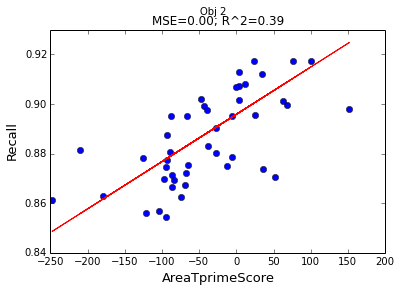

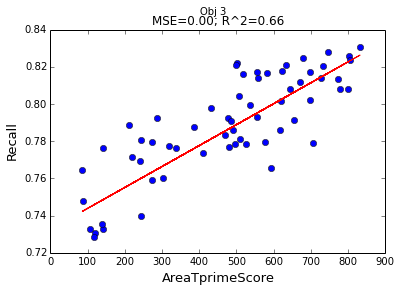

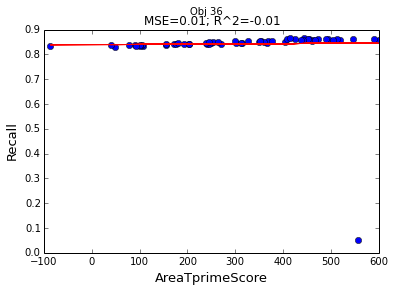

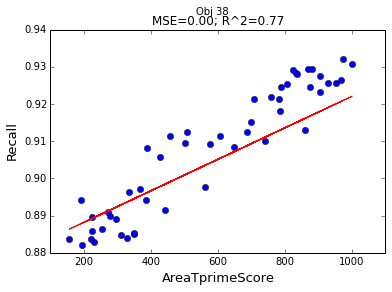

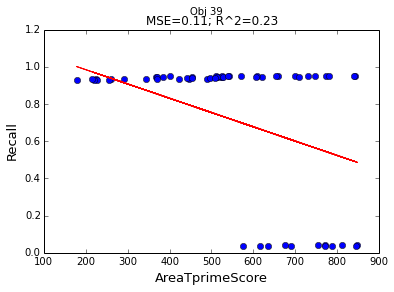

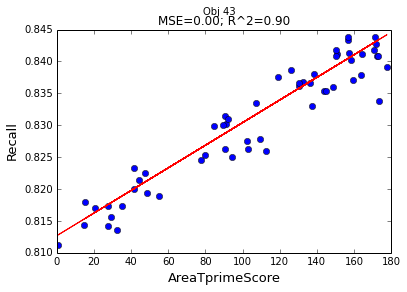

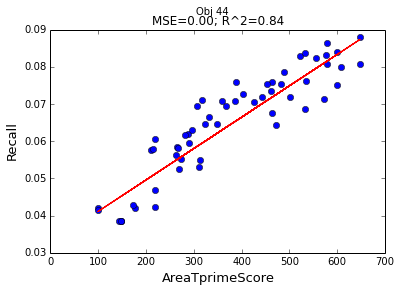

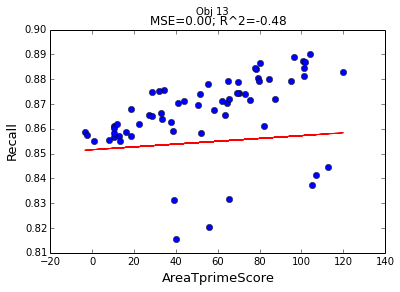

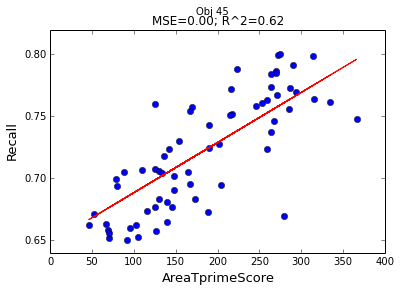

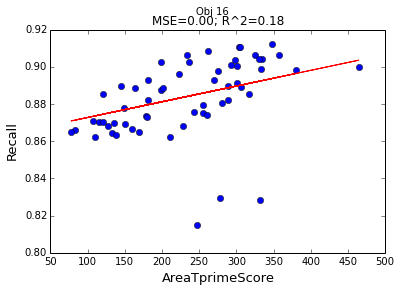

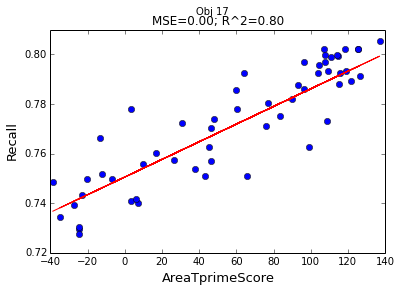

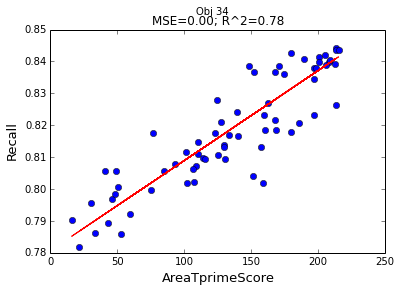

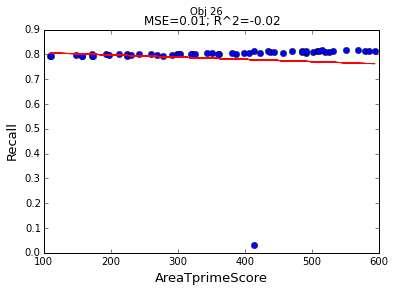

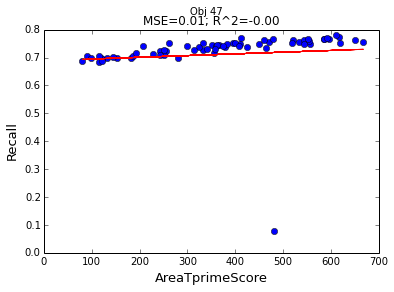

In [141]:
for objid in list(set(df.objid)):
    df_obj = df[df["objid"]==objid]
    x_attr = ["AreaTprimeScore"]
    y_attr = ["Recall"]

    regression_results(df_obj,x_attr,y_attr,PLOT=True)
    plt.suptitle("Obj {}".format(objid))

### Look at the Tprime's that are bad

There is one large piece on the top right that is sometimes getting included and sometimes not, so that's why the precision drop for those ones 

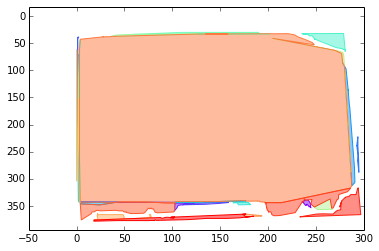

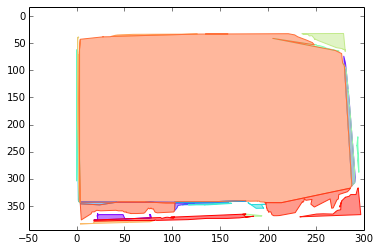

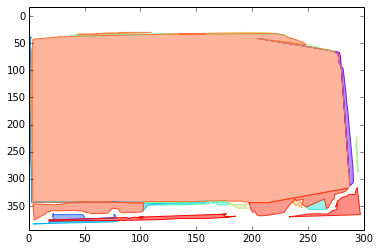

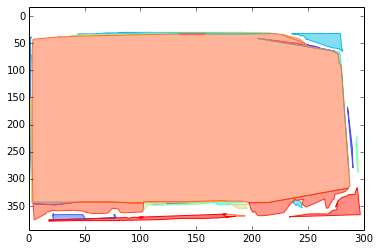

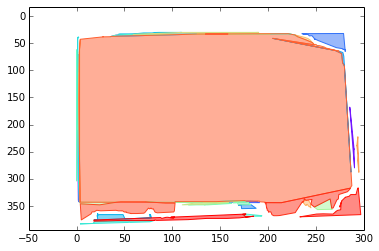

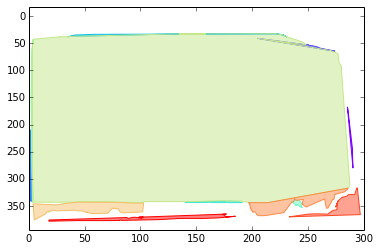

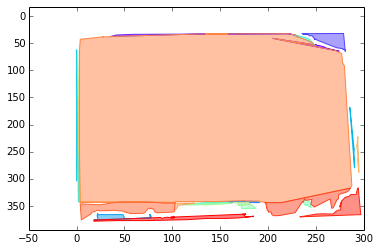

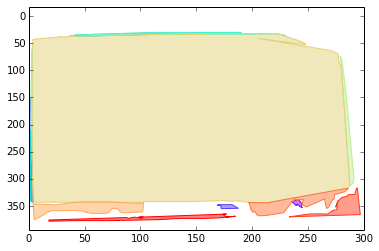

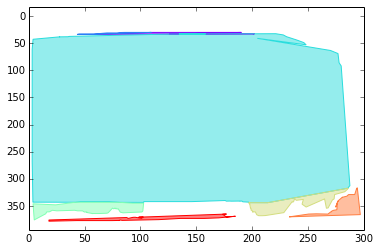

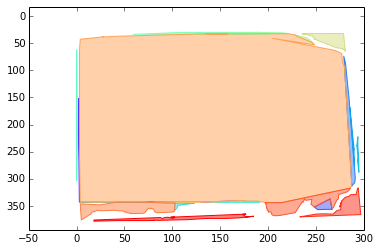

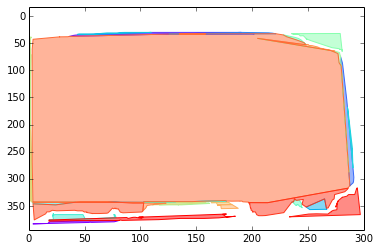

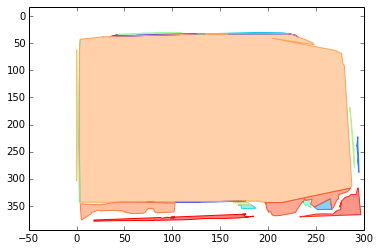

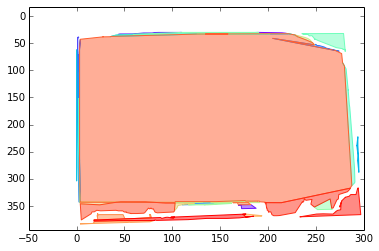

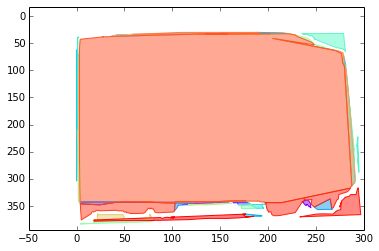

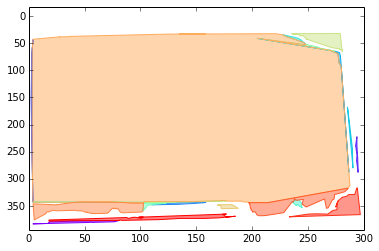

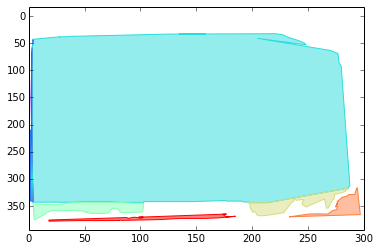

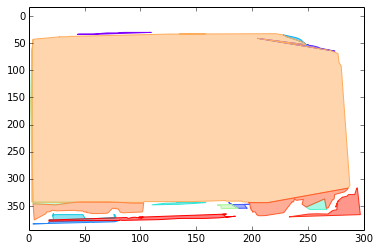

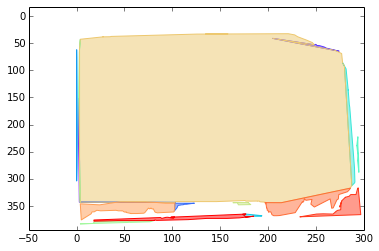

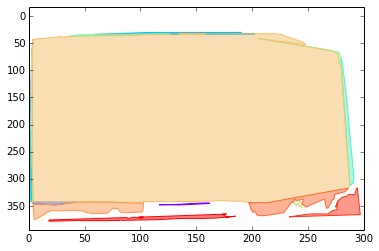

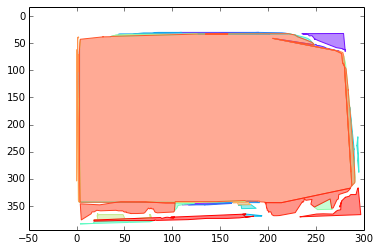

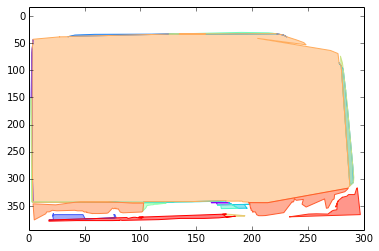

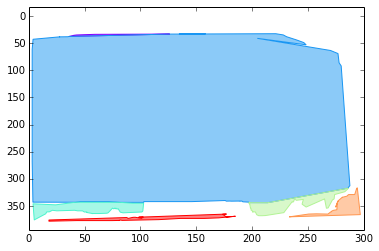

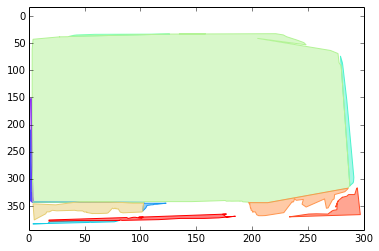

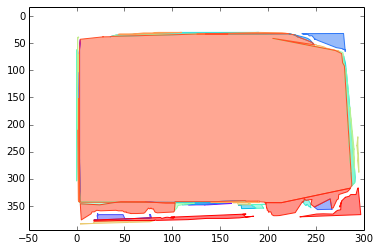

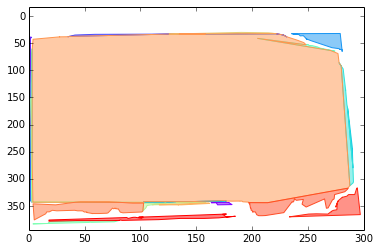

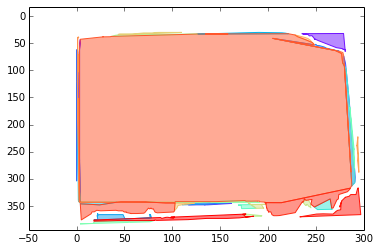

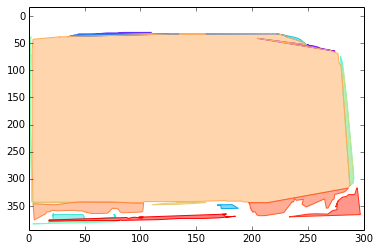

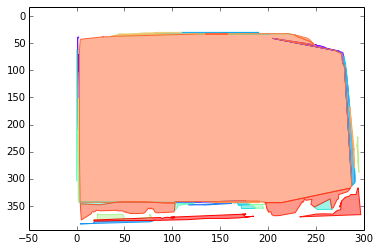

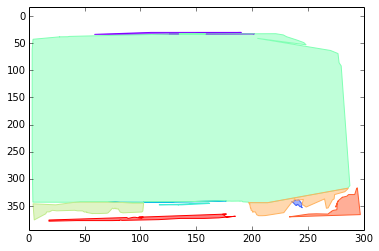

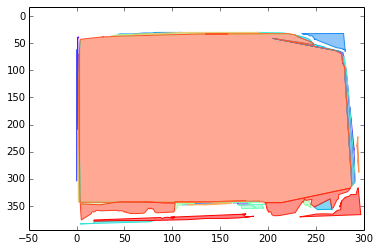

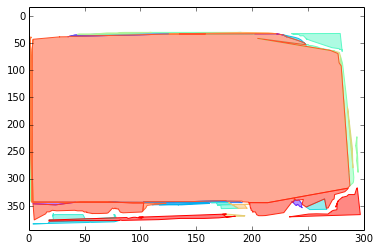

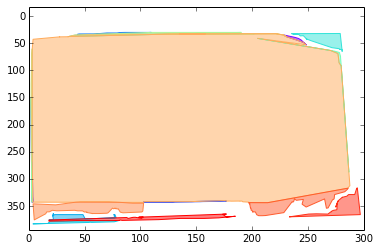

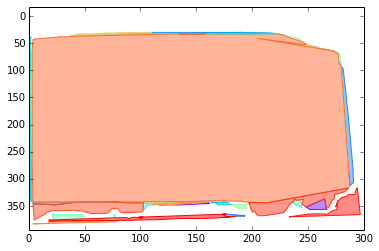

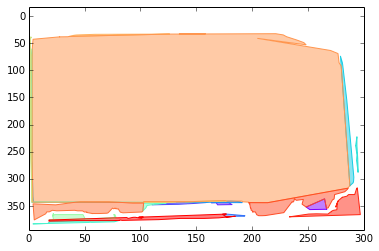

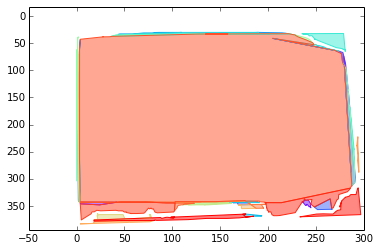

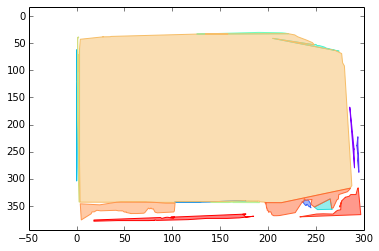

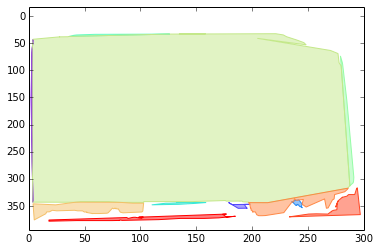

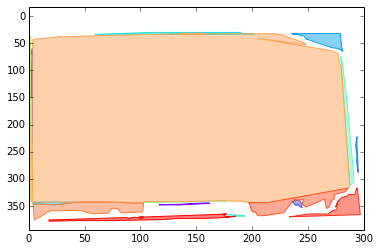

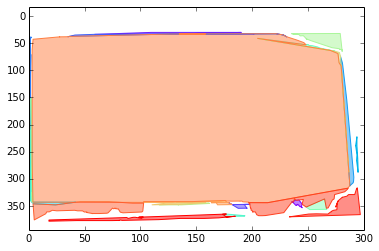

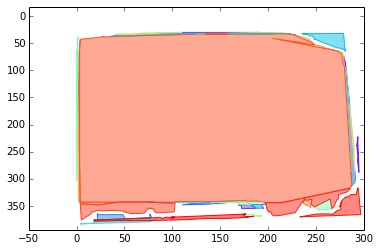

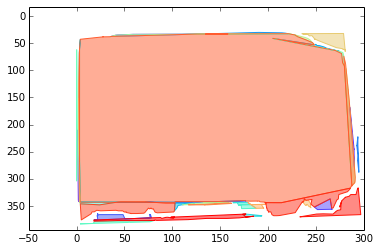

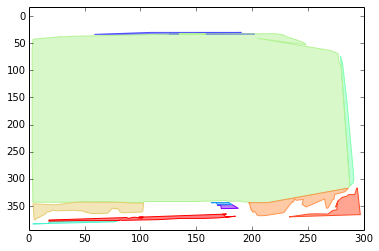

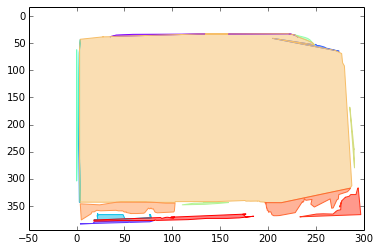

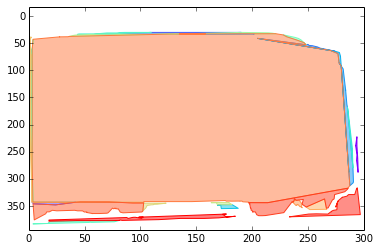

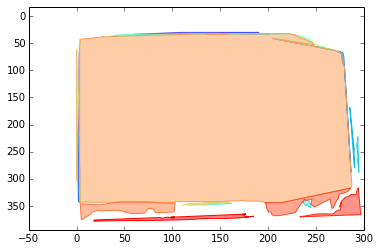

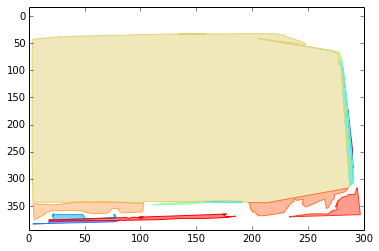

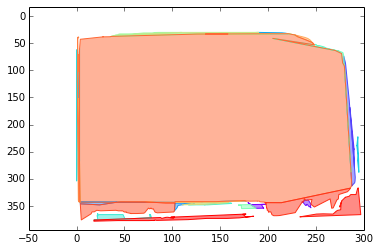

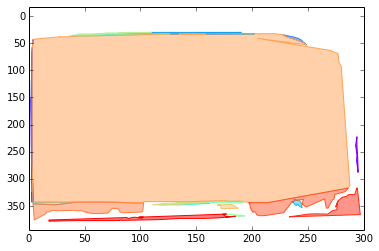

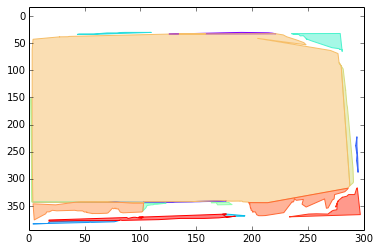

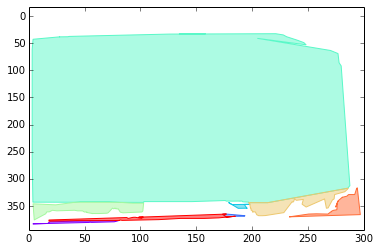

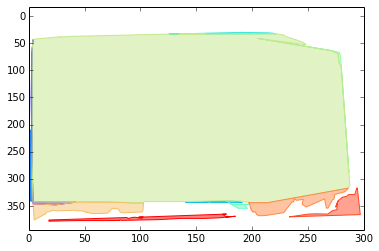

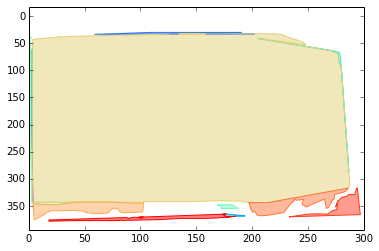

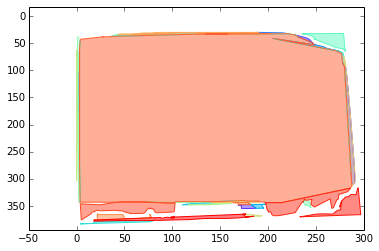

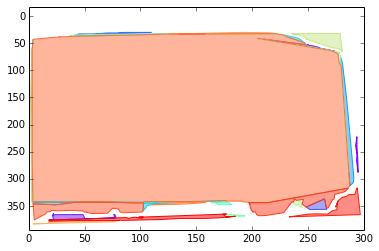

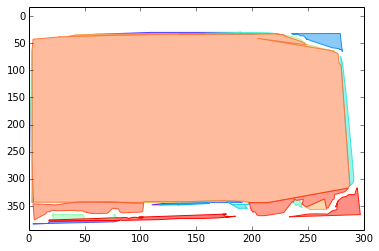

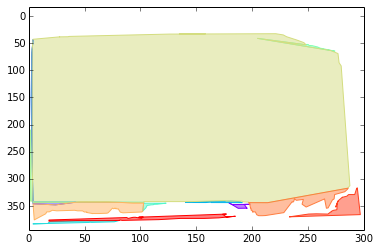

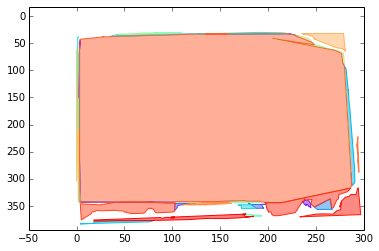

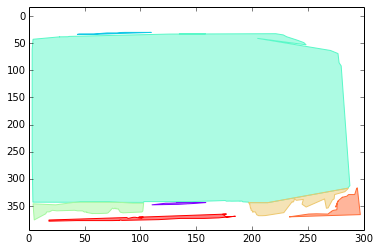

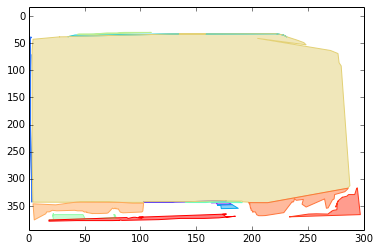

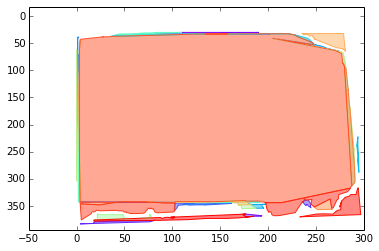

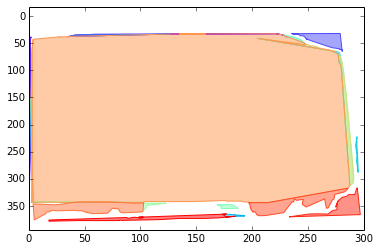

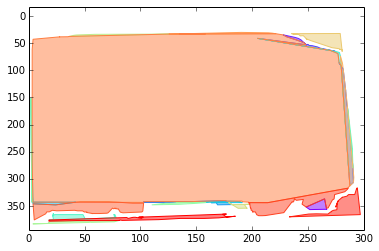

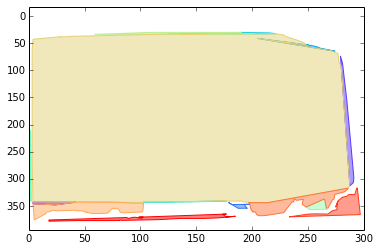

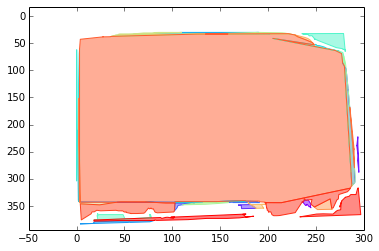

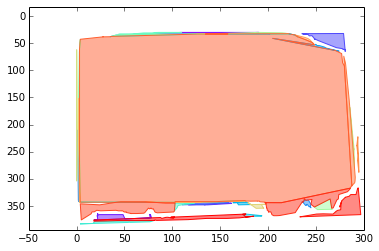

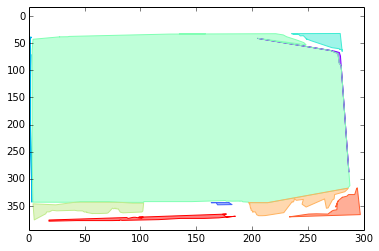

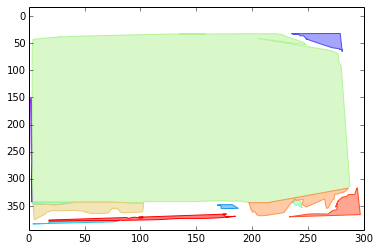

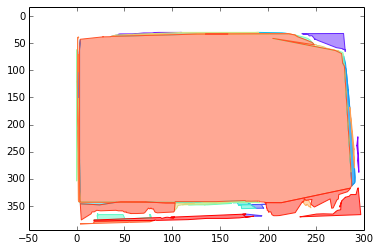

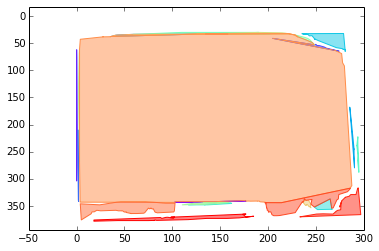

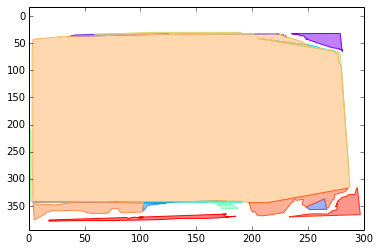

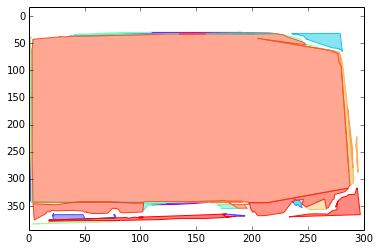

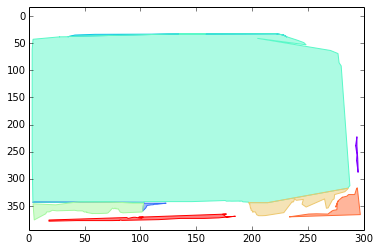

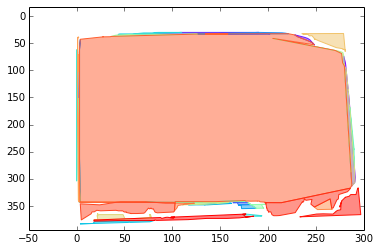

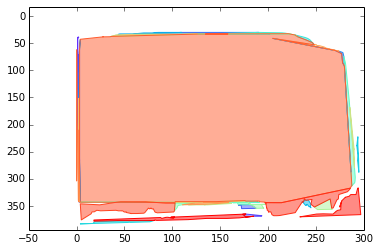

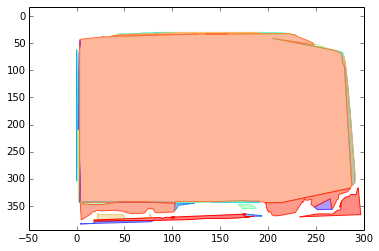

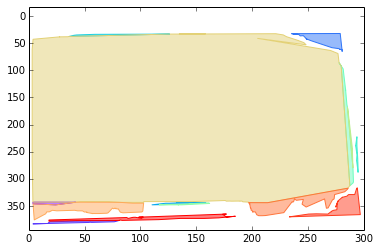

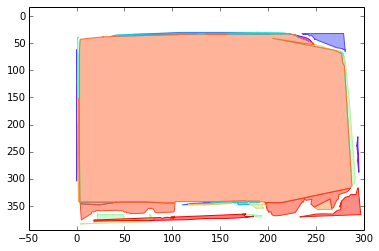

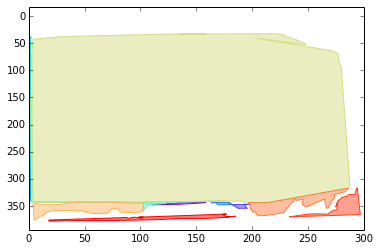

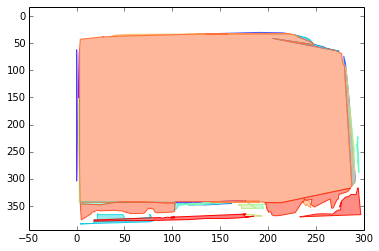

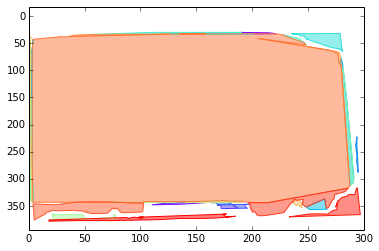

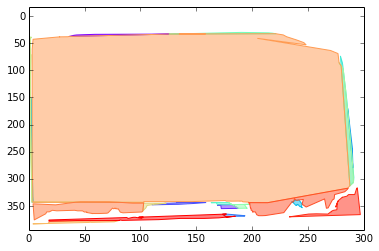

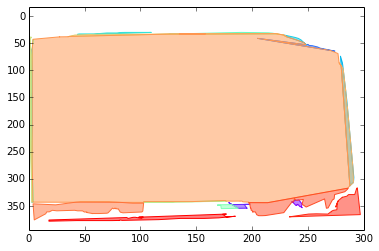

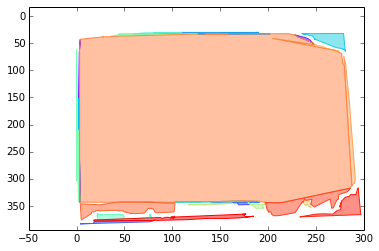

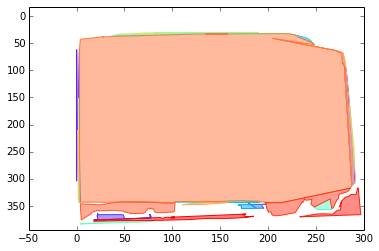

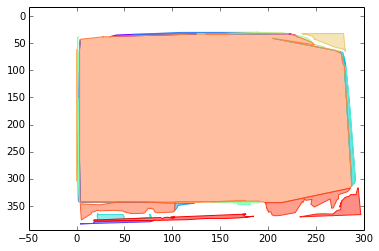

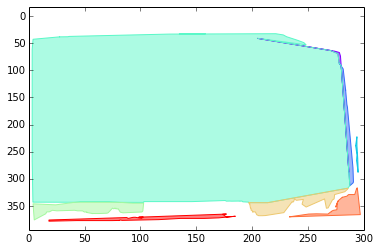

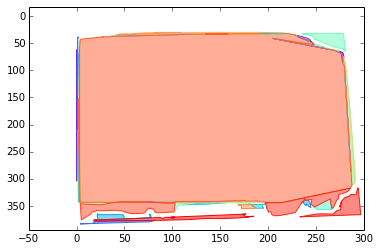

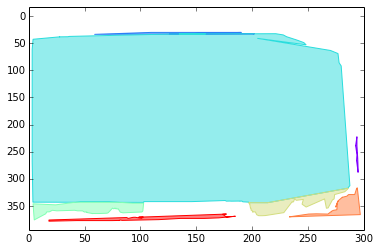

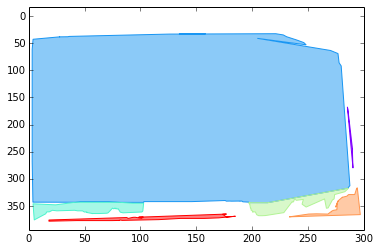

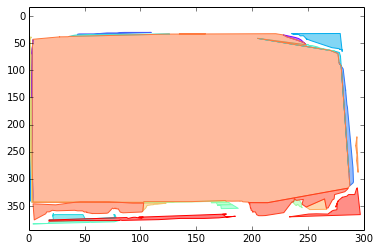

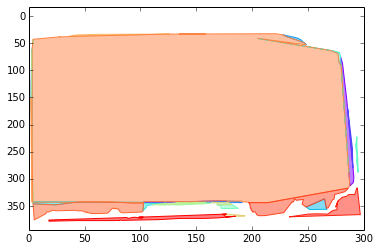

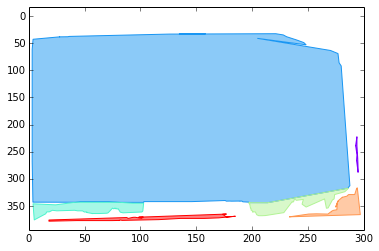

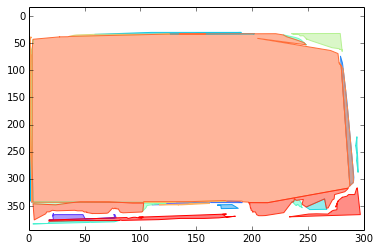

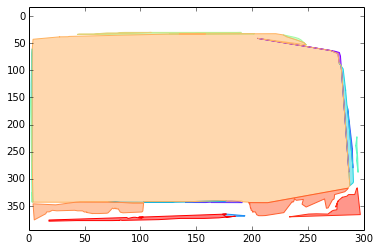

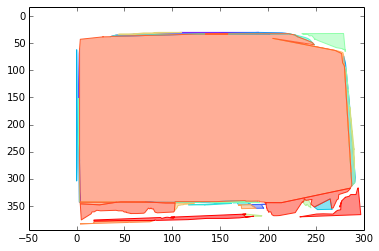

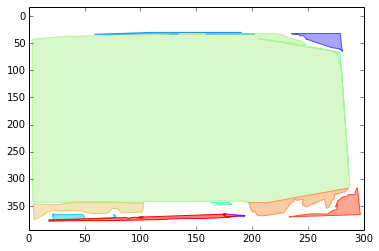

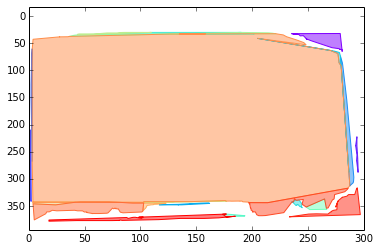

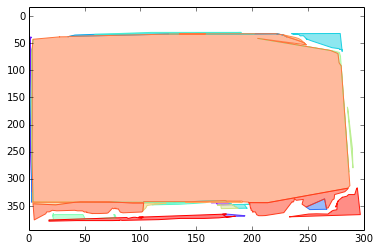

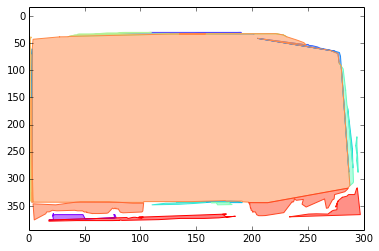

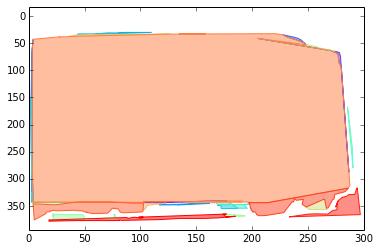

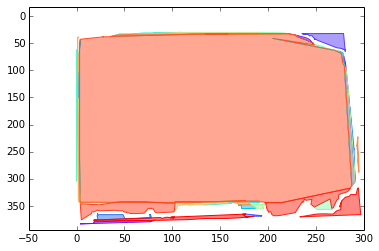

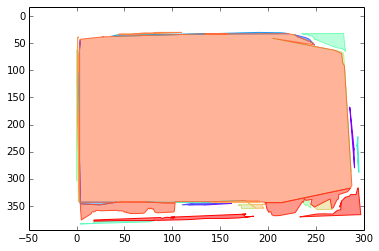

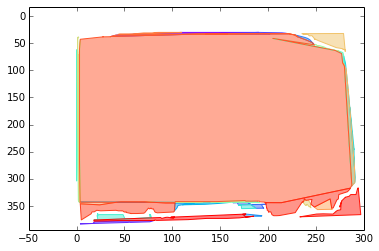

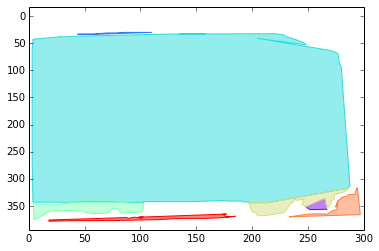

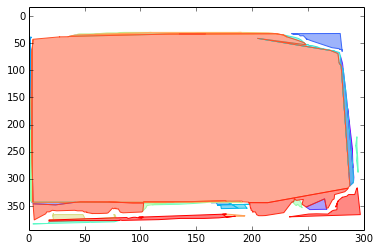

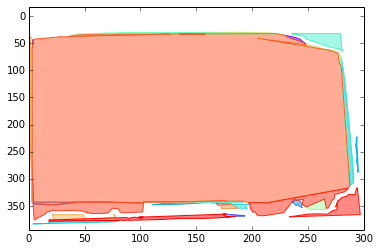

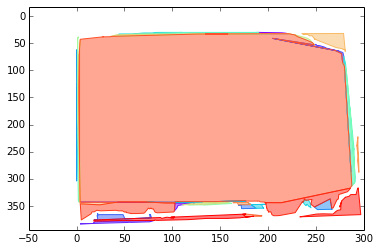

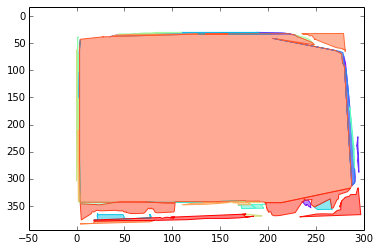

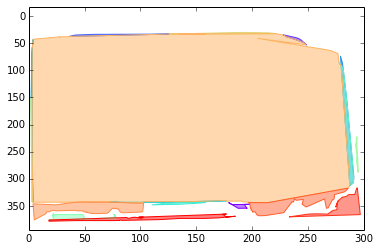

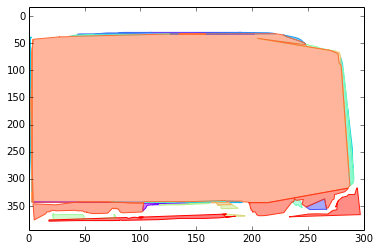

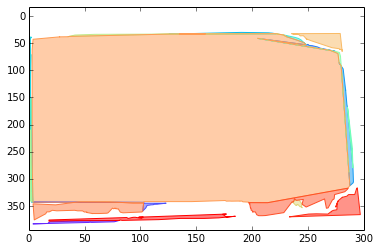

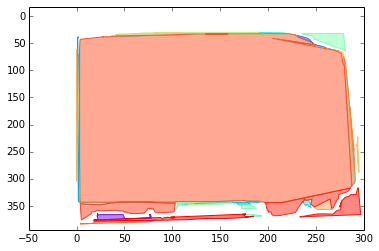

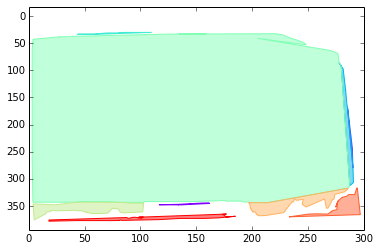

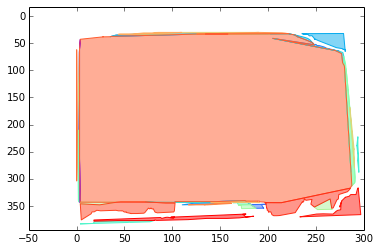

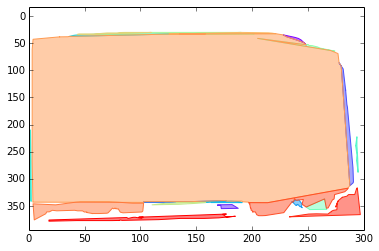

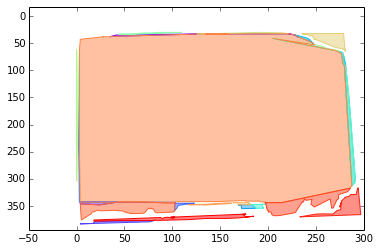

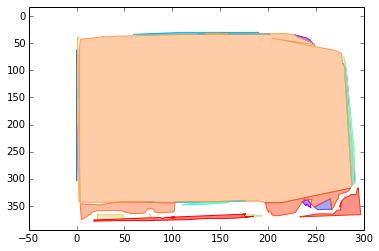

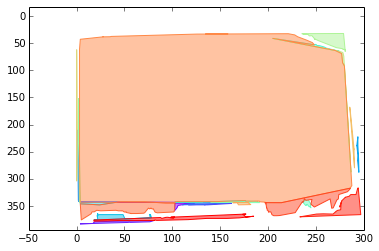

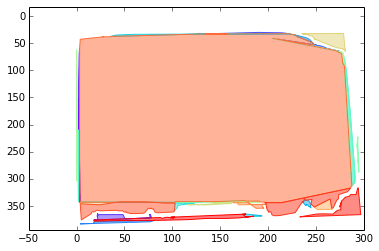

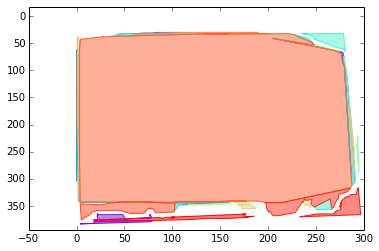

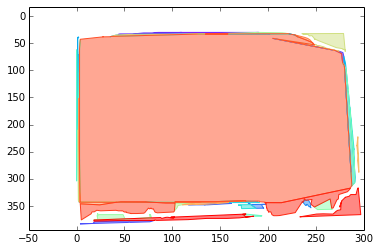

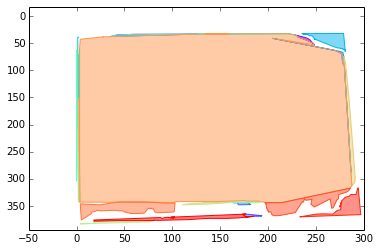

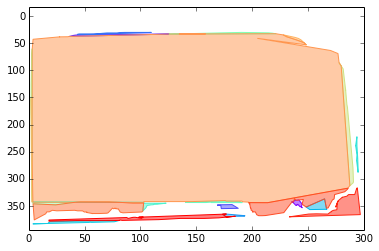

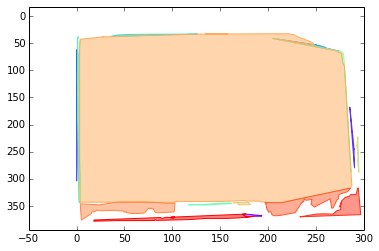

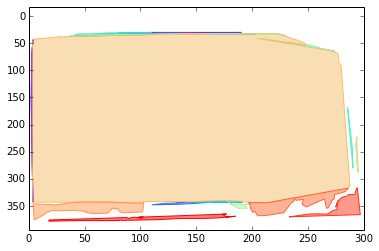

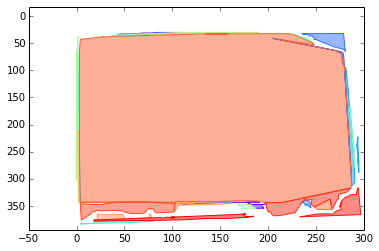

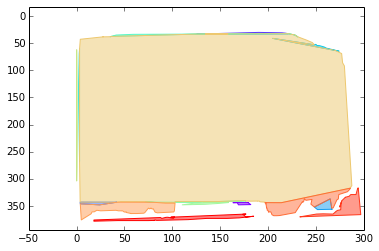

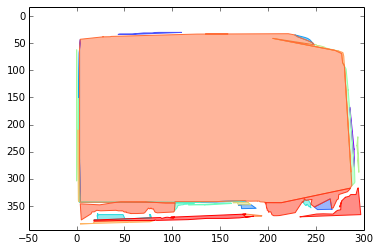

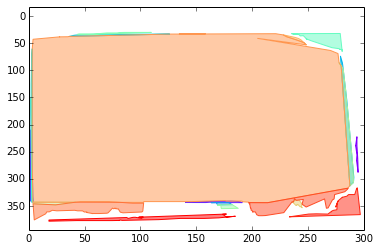

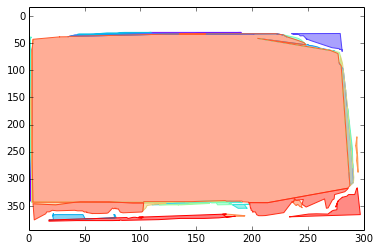

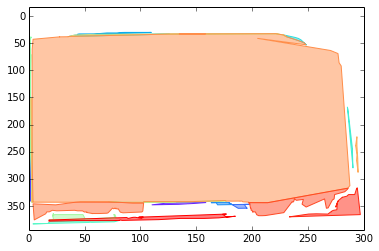

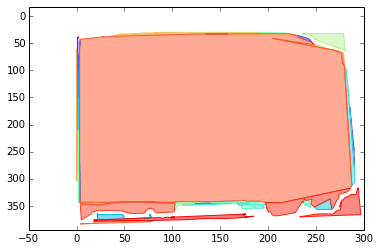

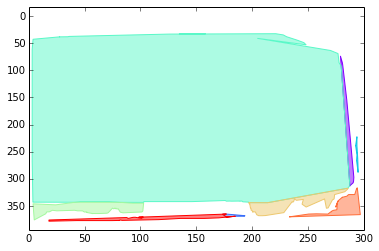

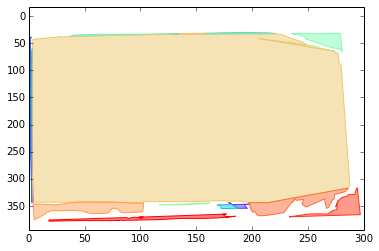

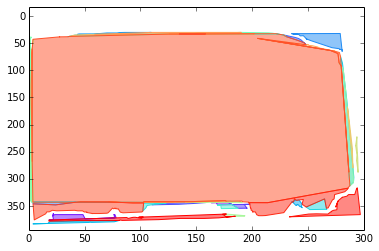

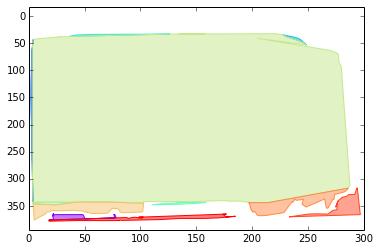

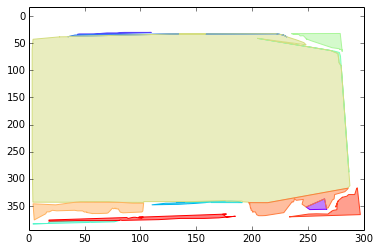

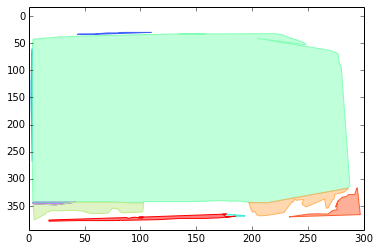

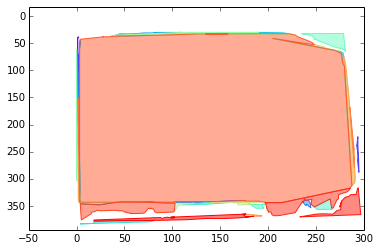

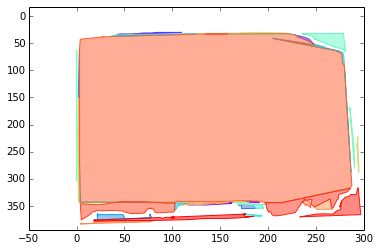

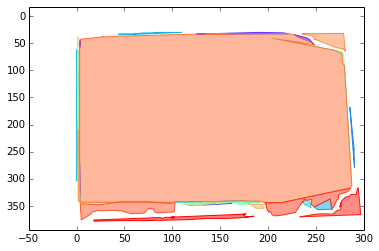

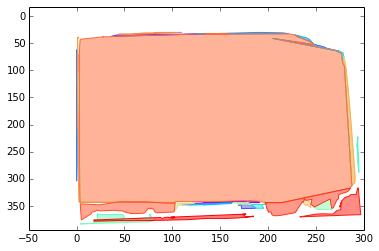

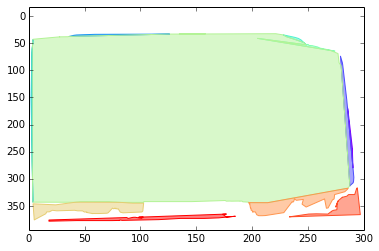

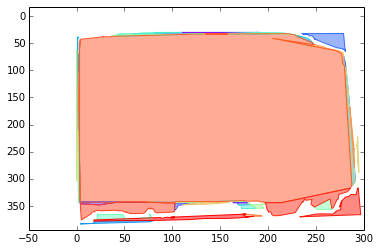

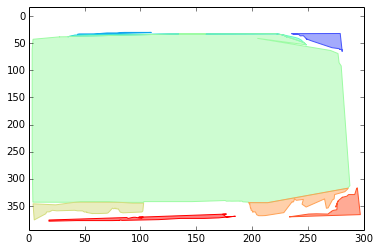

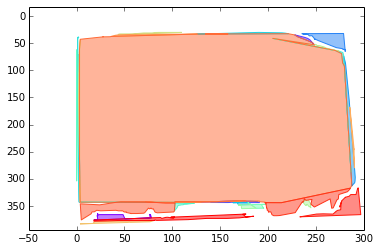

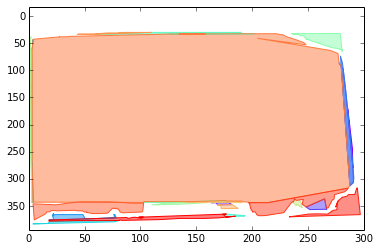

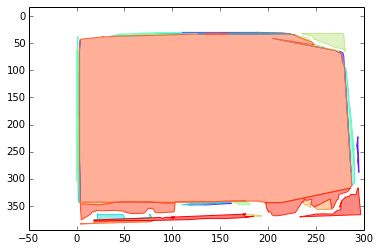

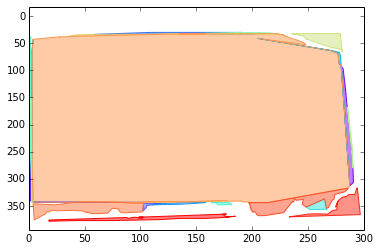

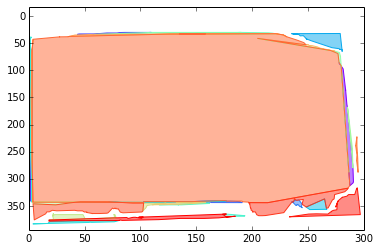

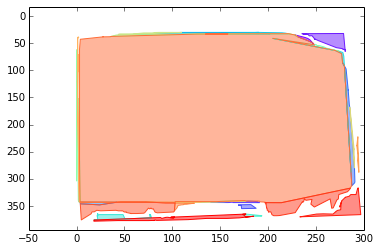

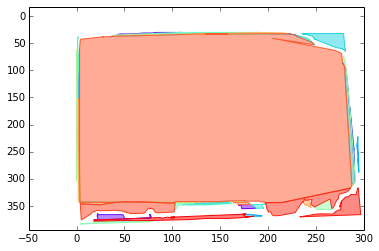

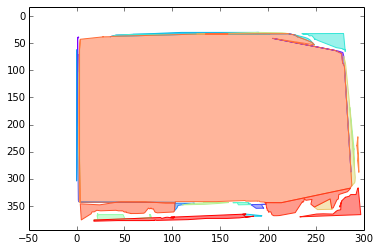

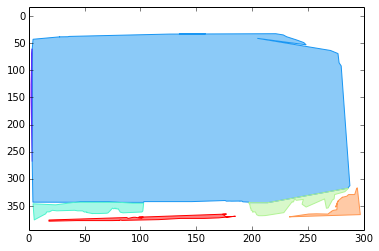

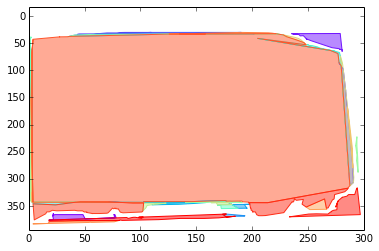

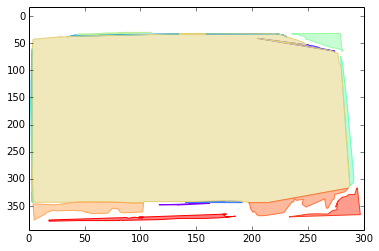

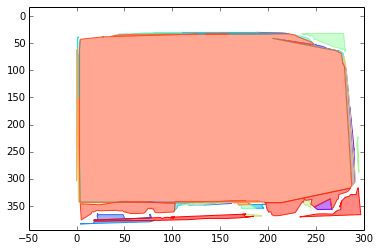

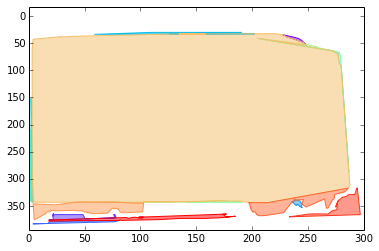

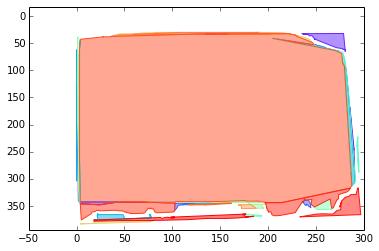

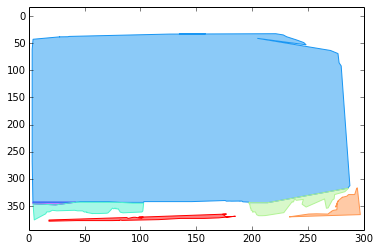

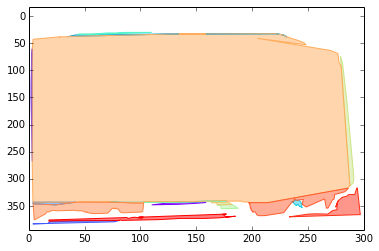

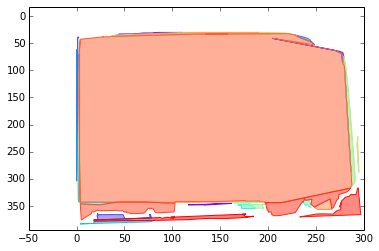

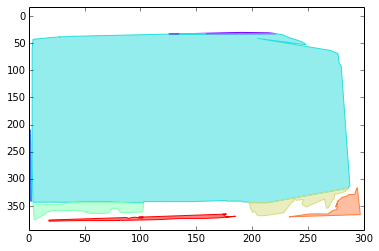

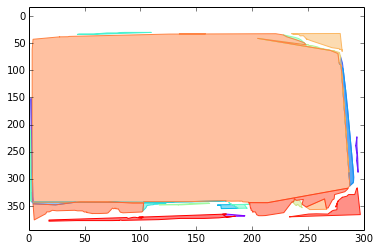

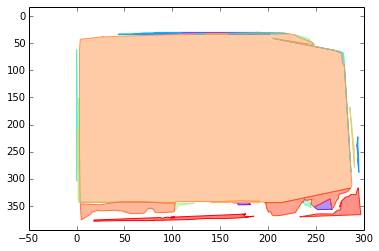

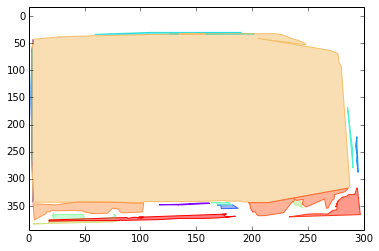

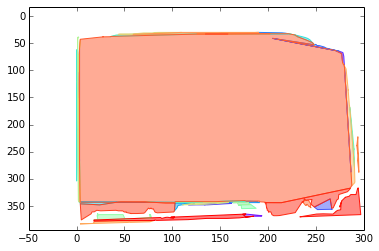

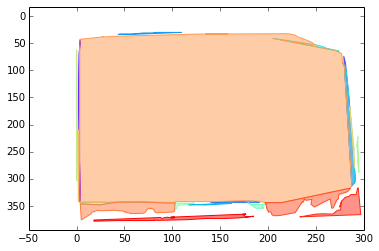

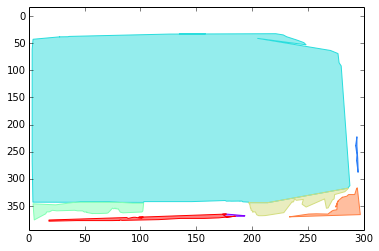

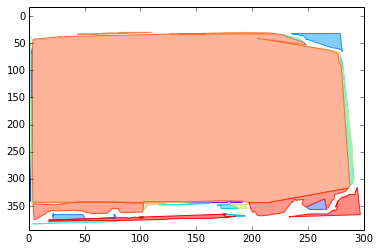

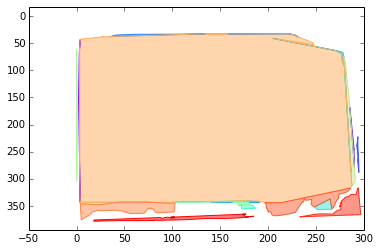

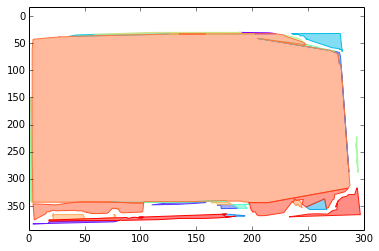

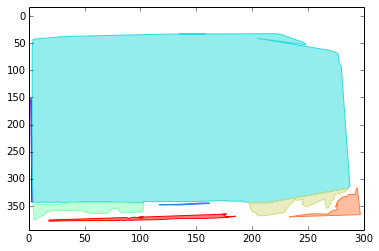

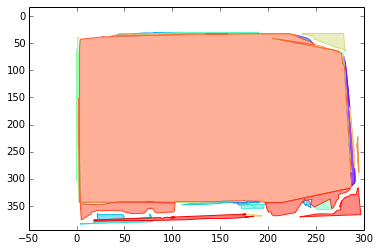

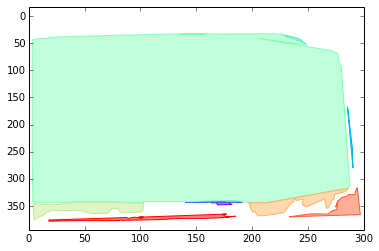

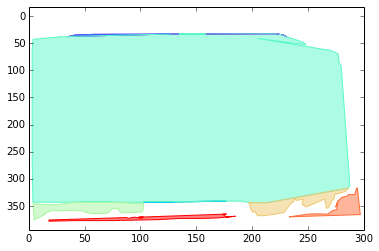

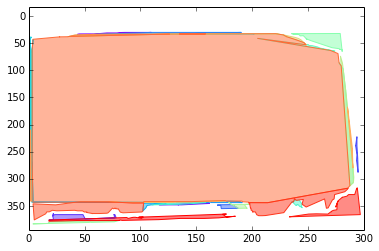

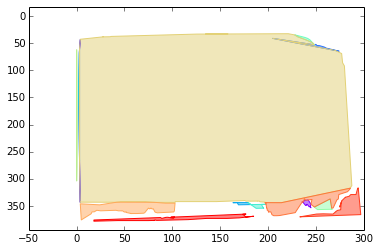

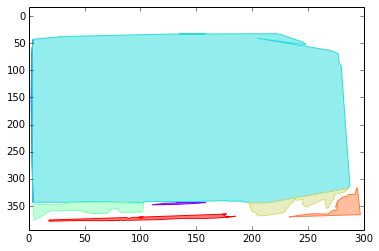

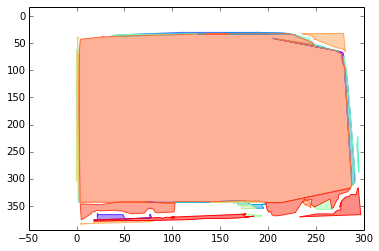

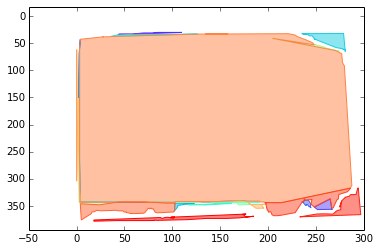

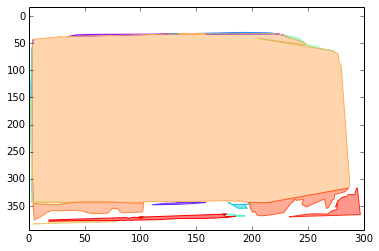

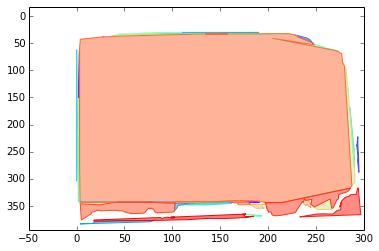

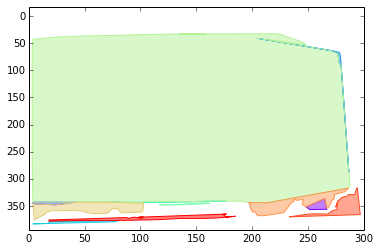

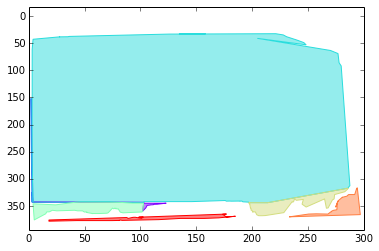

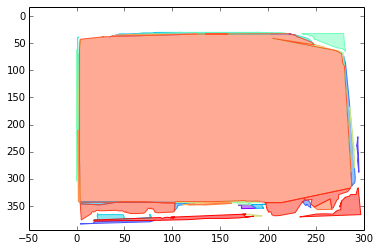

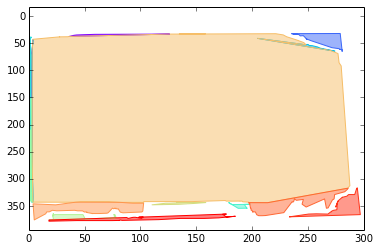

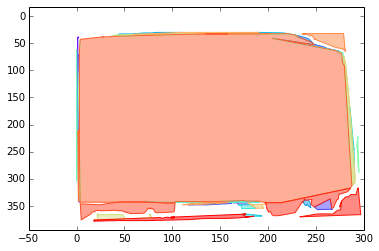

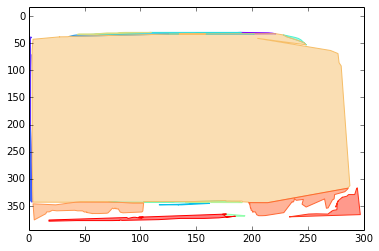

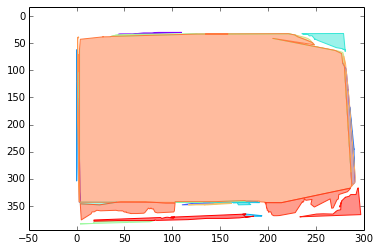

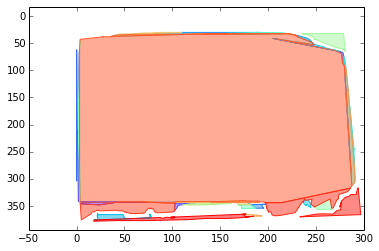

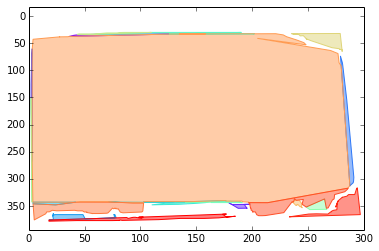

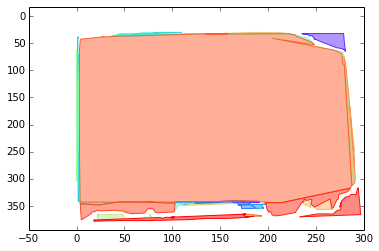

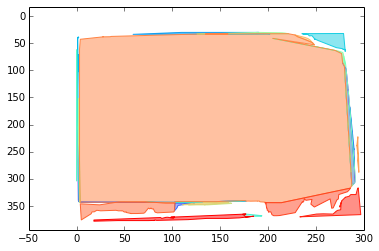

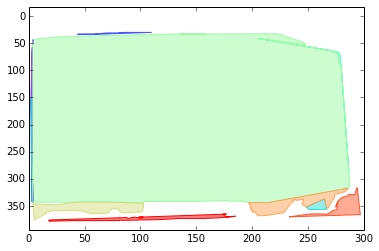

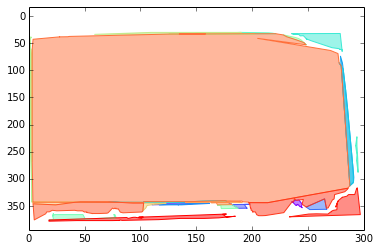

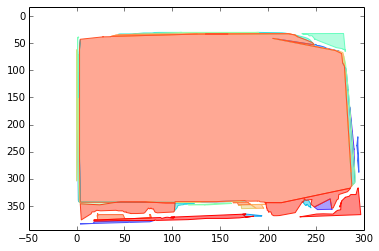

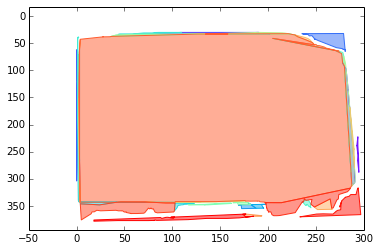

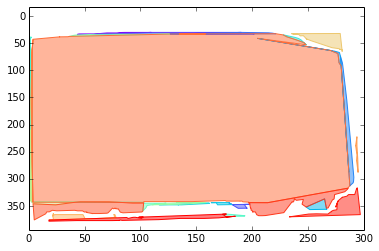

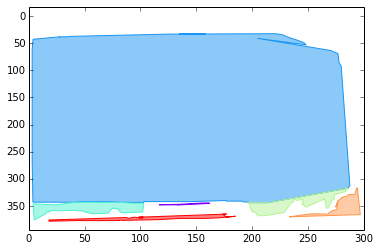

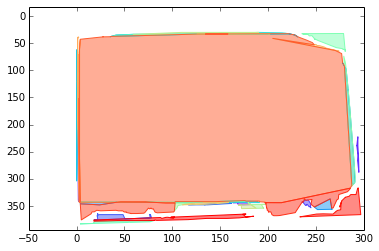

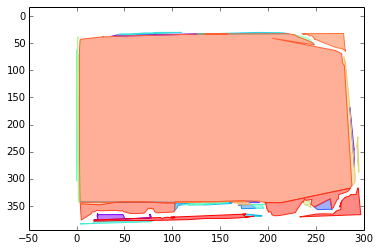

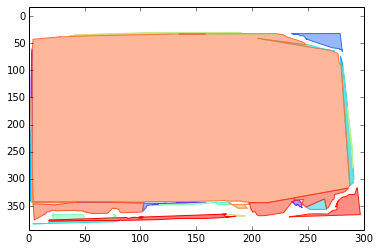

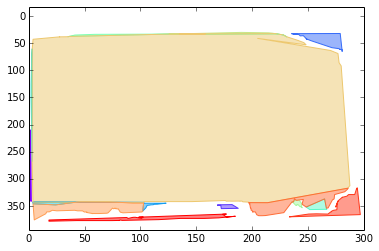

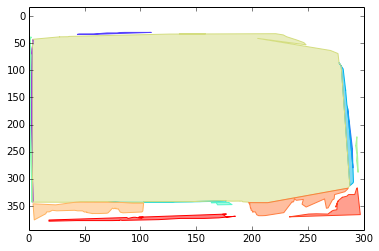

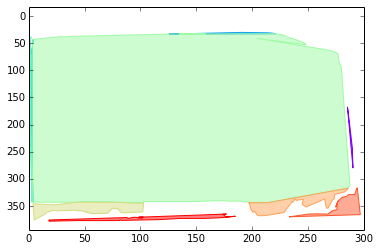

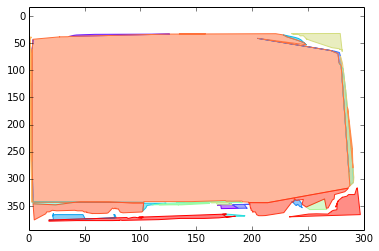

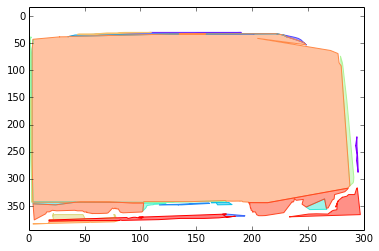

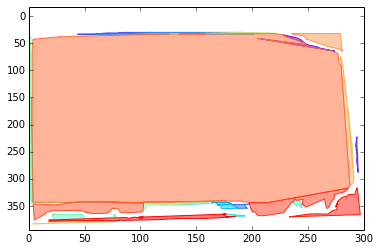

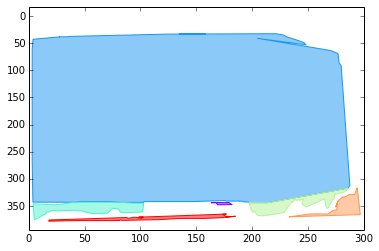

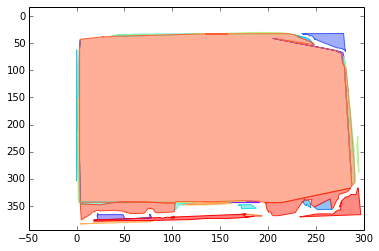

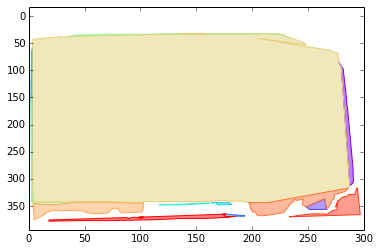

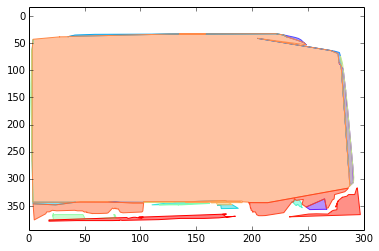

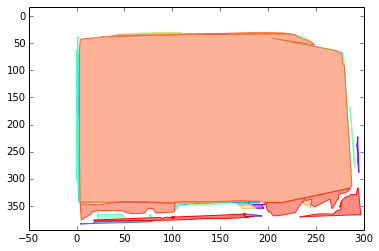

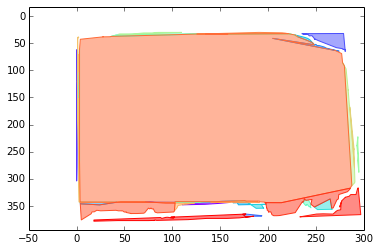

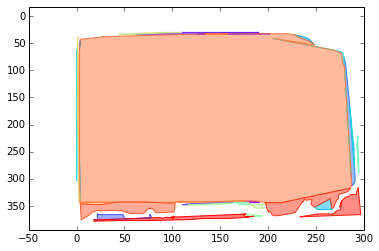

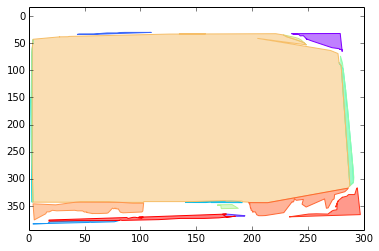

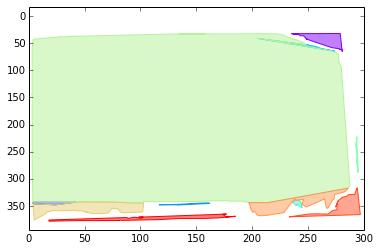

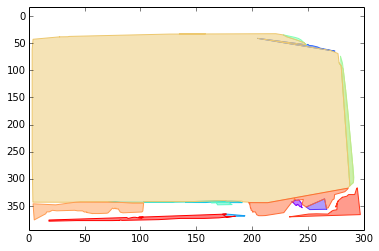

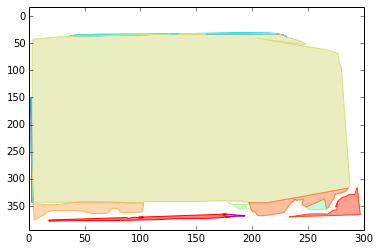

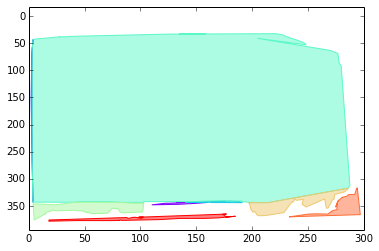

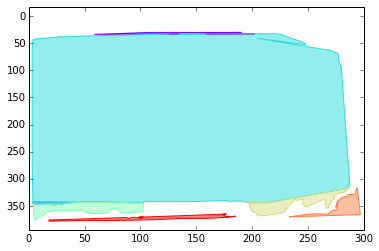

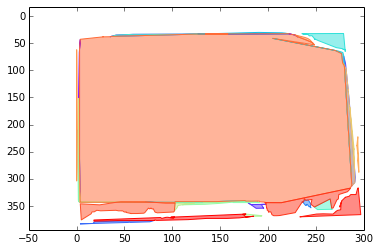

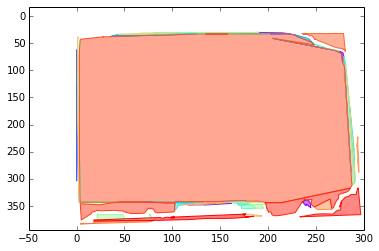

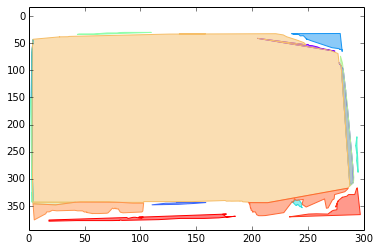

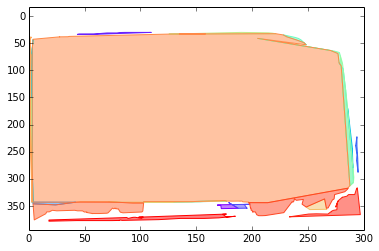

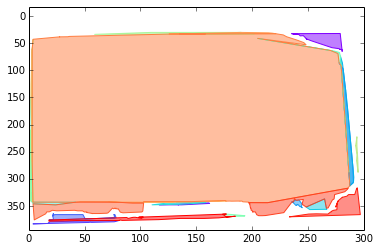

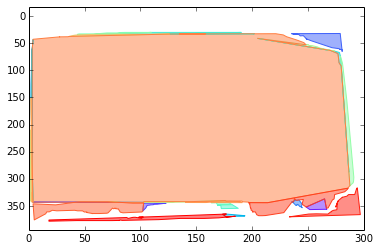

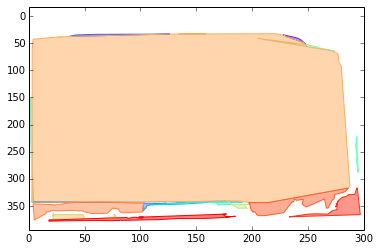

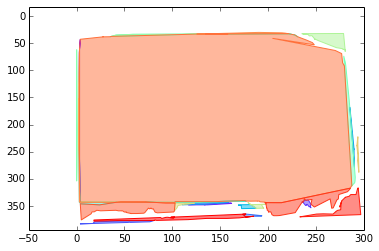

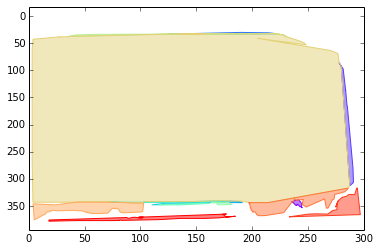

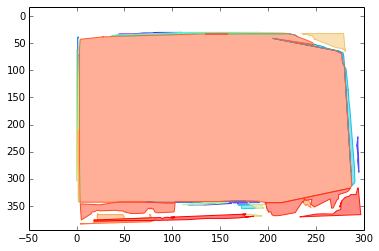

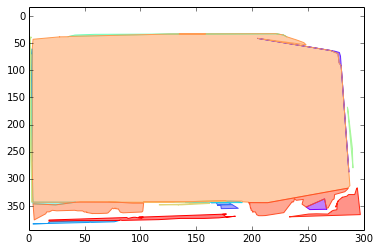

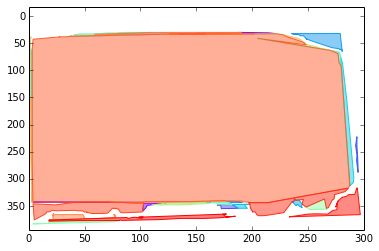

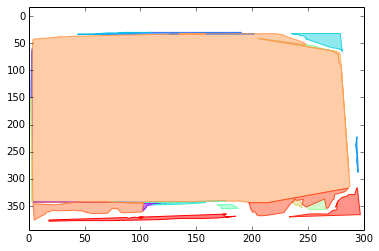

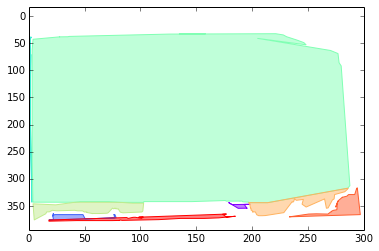

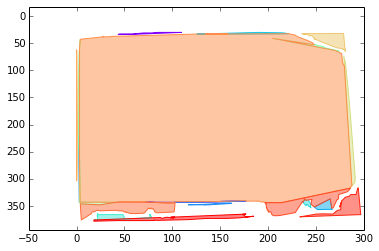

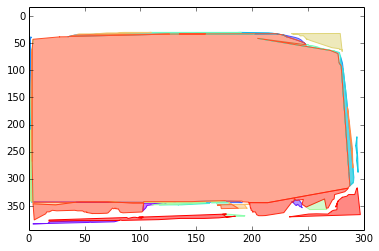

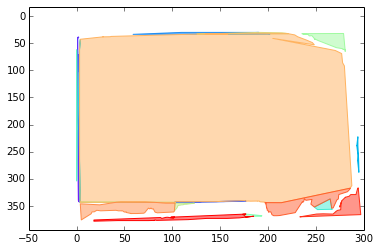

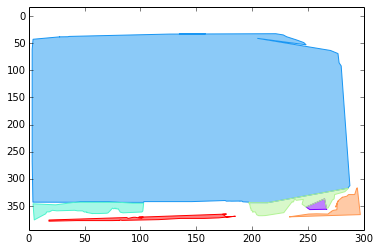

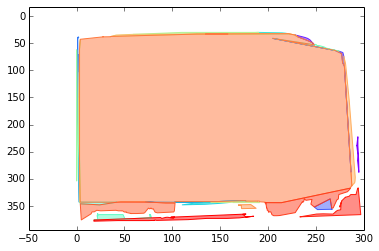

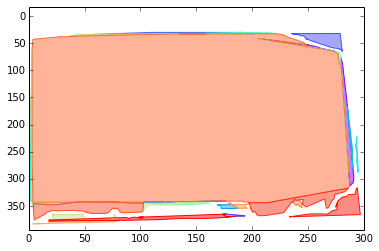

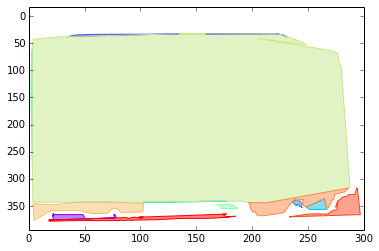

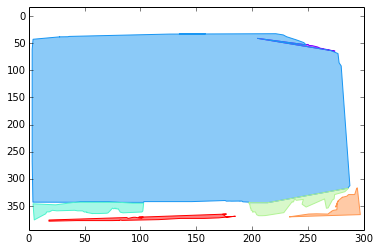

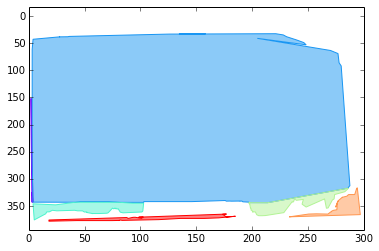

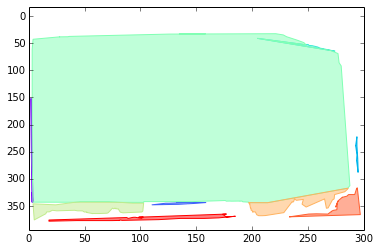

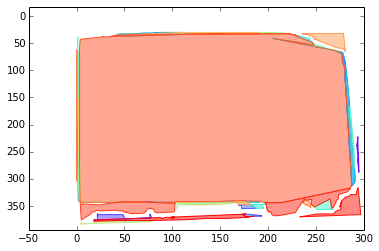

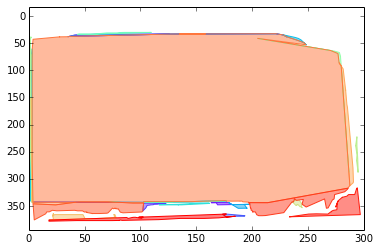

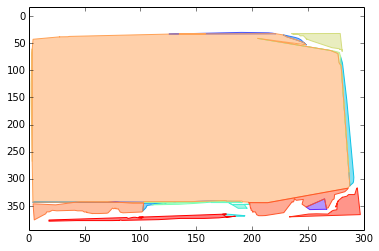

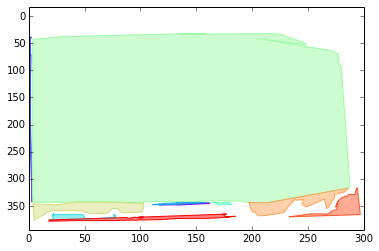

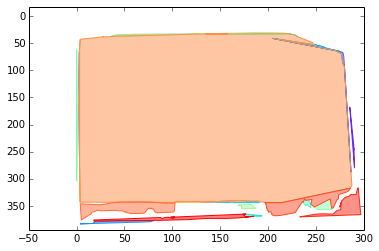

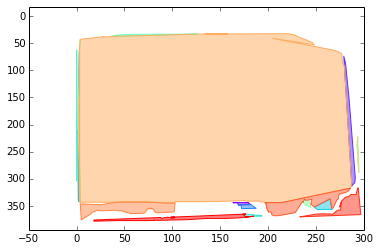

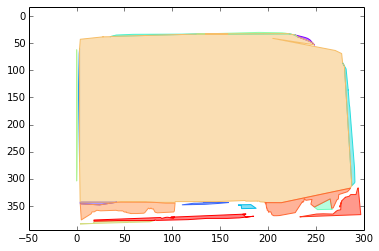

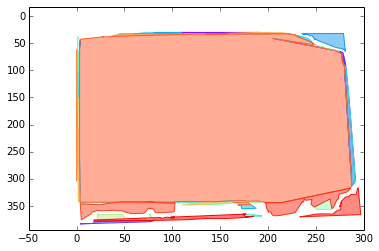

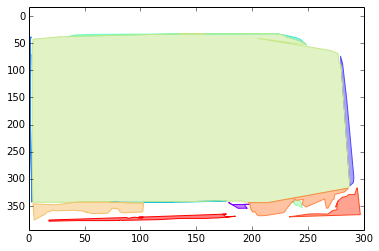

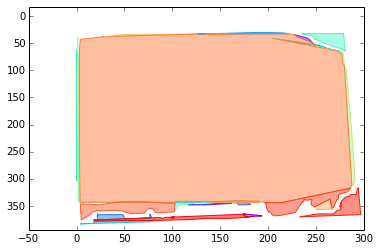

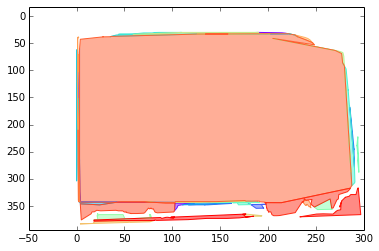

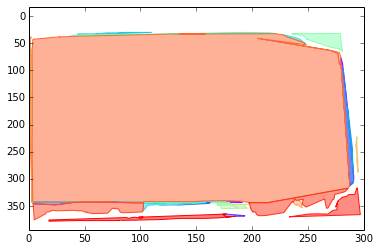

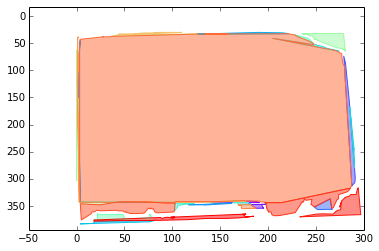

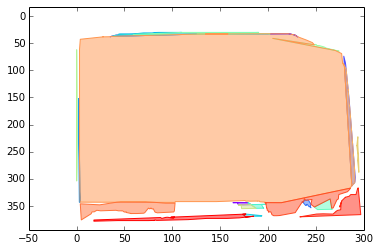

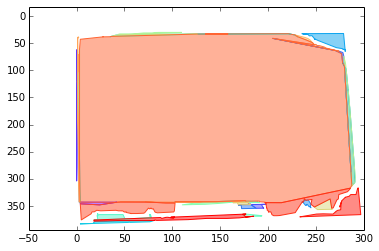

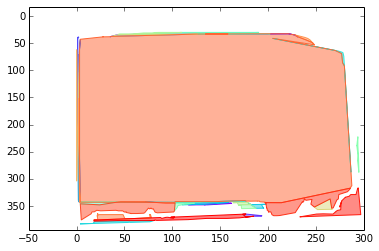

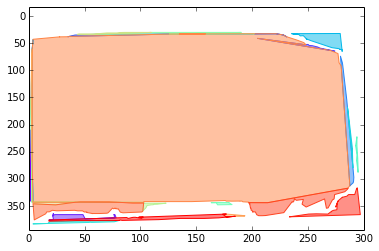

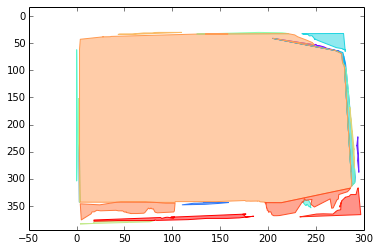

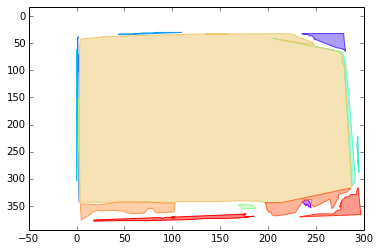

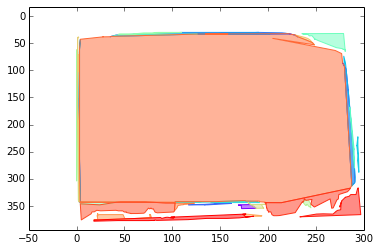

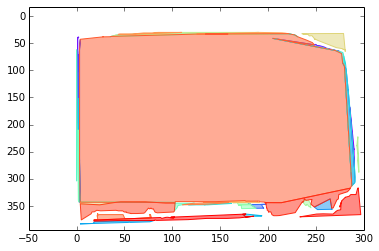

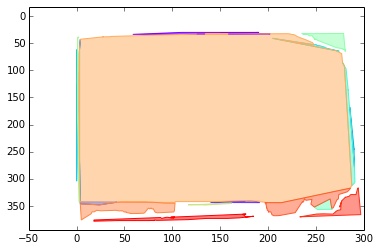

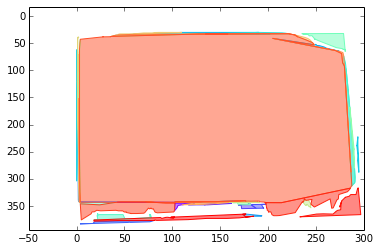

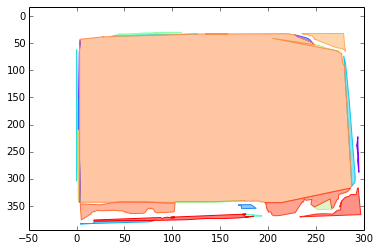

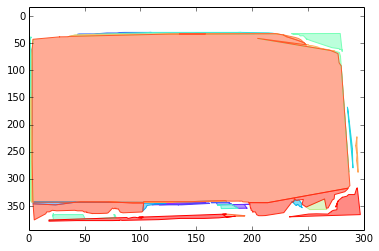

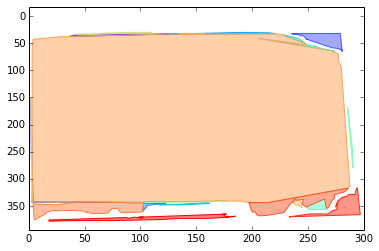

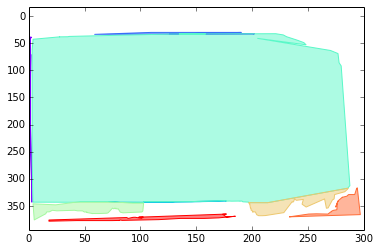

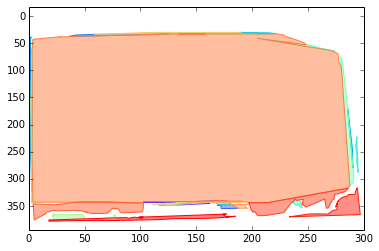

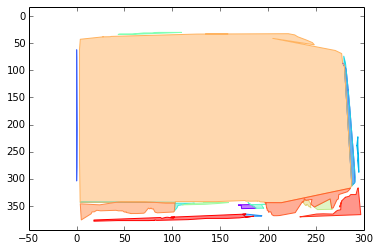

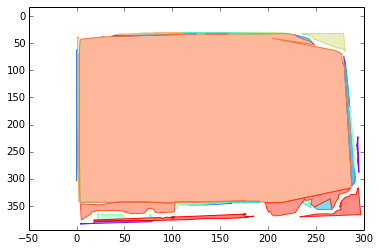

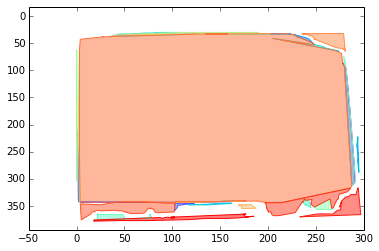

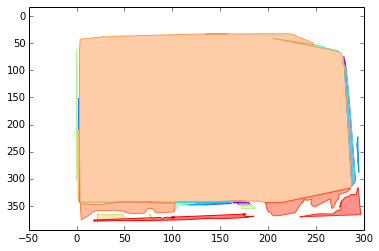

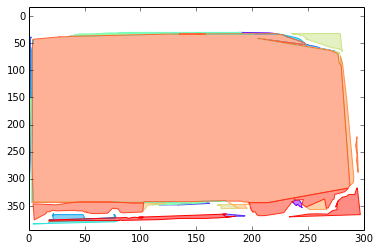

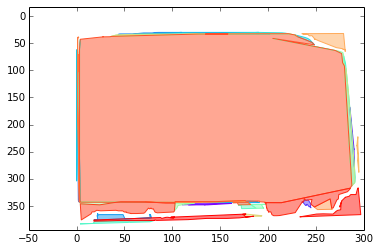

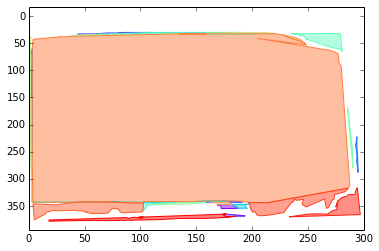

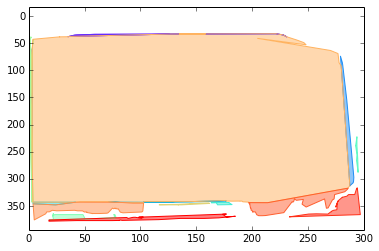

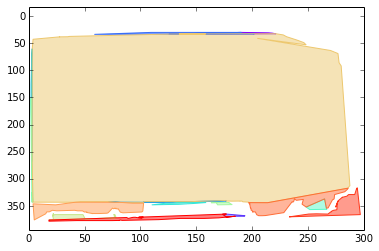

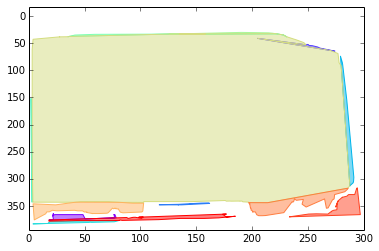

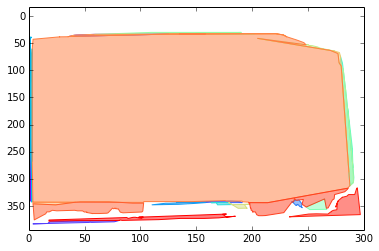

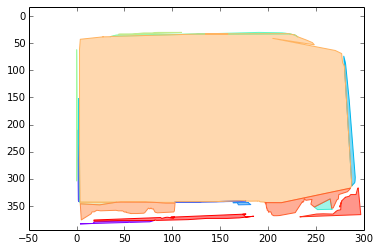

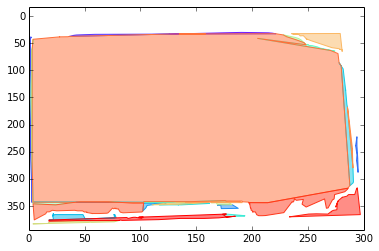

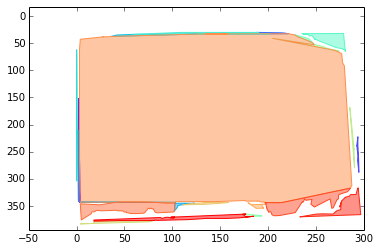

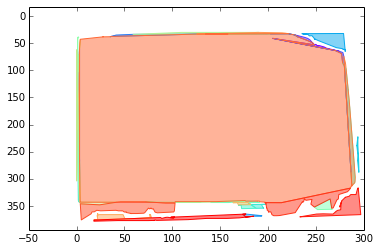

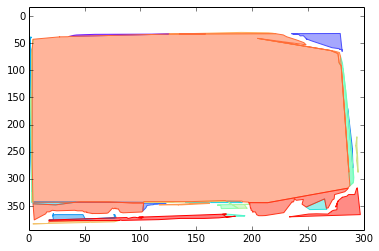

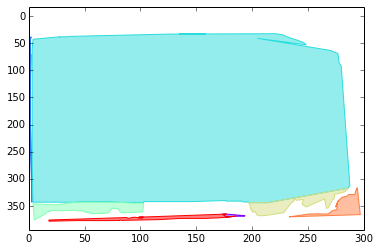

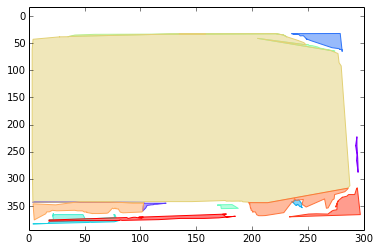

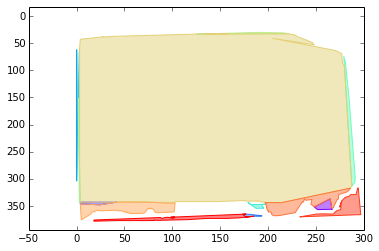

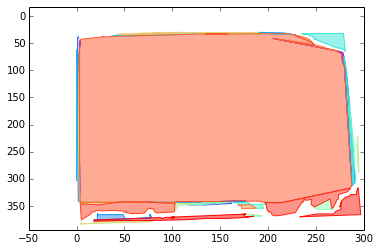

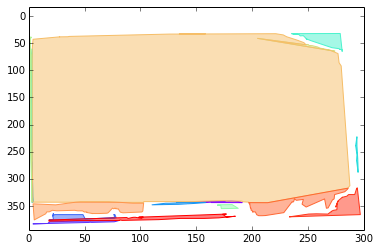

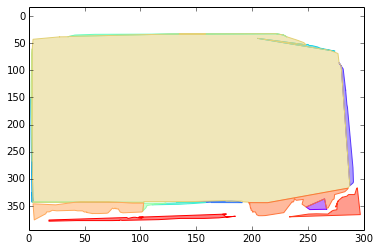

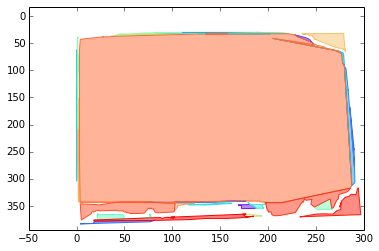

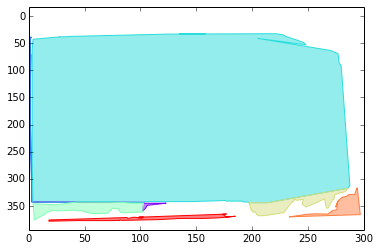

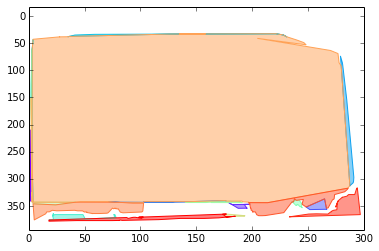

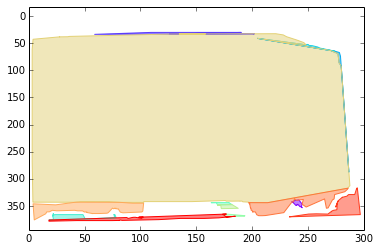

In [145]:
objid = 39
tiles=pkl.load(open("vtiles{}.pkl".format(objid)))
for Tprime_str in df[df["objid"]==objid]["T prime"]:
    Tprime = ast.literal_eval(Tprime_str)
    visualizeTilesSeparate(list(np.array(tiles)[Tprime]))

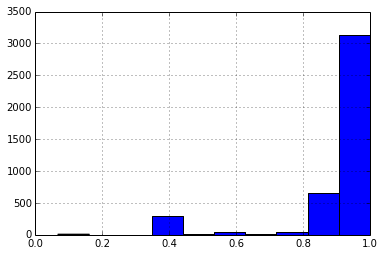

In [143]:
df["Precision"].hist()

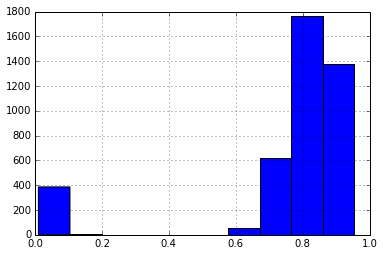

In [144]:
df["Recall"].hist()

So if you prune out the cases with very low precision or recall, you should get a better regression result, also change the ylim to see the data better 

In [81]:
# df_obj["Precision"]>0.5]#&(

---------------------------------------------
Regression x=['pTprimeGTLSA[Athres>5]'];y=['Precision']
Coefficients:  [[ 0.00010362]]
Mean squared error: 0.00
R^2: 0.87
---------------------------------------------
Regression x=['pTprimeGTLSA[Athres>5]'];y=['Precision']
Coefficients:  [[ 0.00015937]]
Mean squared error: 0.00
R^2: 0.71
---------------------------------------------
Regression x=['pTprimeGTLSA[Athres>5]'];y=['Precision']
Coefficients:  [[  3.11171969e-05]]
Mean squared error: 0.00
R^2: 0.86
---------------------------------------------
Regression x=['pTprimeGTLSA[Athres>5]'];y=['Precision']
Coefficients:  [[  1.29408898e-05]]
Mean squared error: 0.00
R^2: 0.78
---------------------------------------------
Regression x=['pTprimeGTLSA[Athres>5]'];y=['Precision']
Coefficients:  [[  3.13990649e-05]]
Mean squared error: 0.00
R^2: 0.55
---------------------------------------------
Regression x=['pTprimeGTLSA[Athres>5]'];y=['Precision']
Coefficients:  [[  3.43692614e-05]]
Mean sq

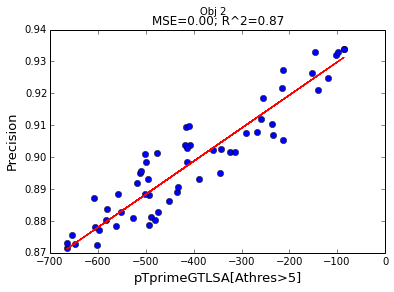

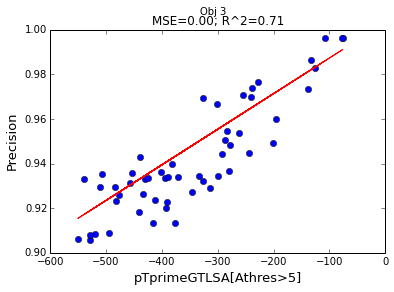

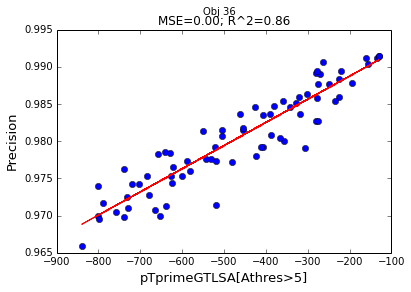

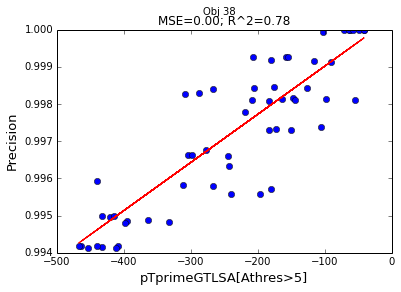

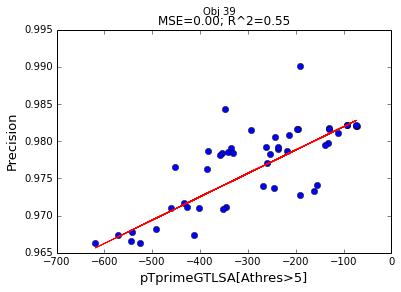

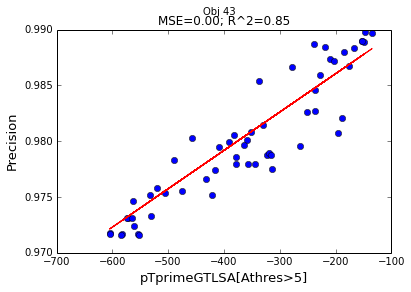

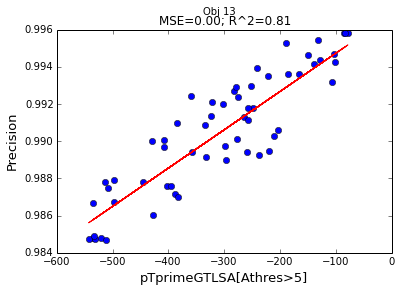

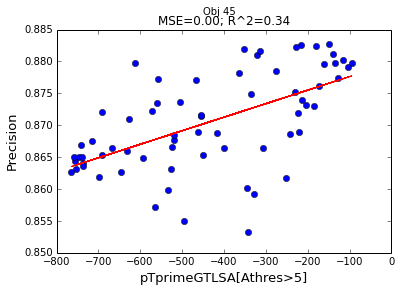

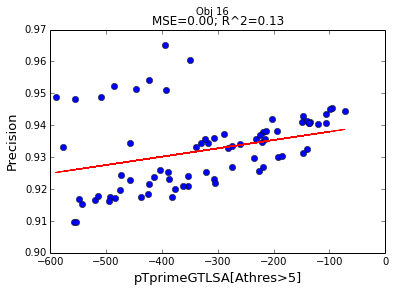

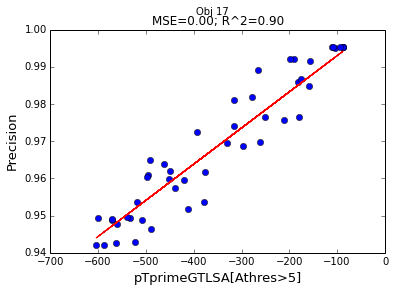

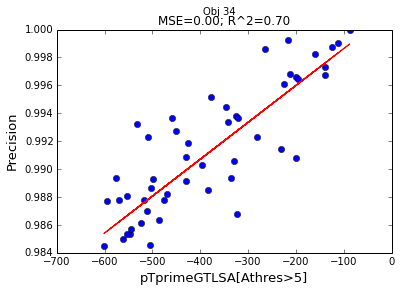

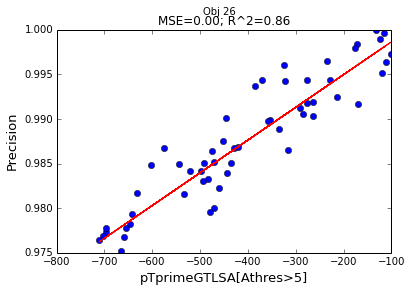

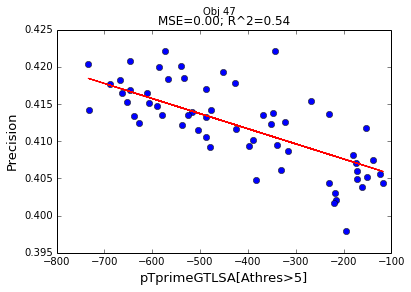

In [87]:
for objid in list(set(df.objid)):
    try:
        df_obj = df[df["objid"]==objid]
        df_obj = df_obj[df_obj["Recall"]>0.3]
        # for threshold in [1,5,10]:
        #x_attr = ["pTprimeGTLSA[Athres>{}]".format(threshold)]
        x_attr = ["pTprimeGTLSA[Athres>5]"]
        y_attr = ["Precision"]

        regression_results(df_obj,x_attr,y_attr,PLOT=True)
        plt.suptitle("Obj {}".format(objid))
    except(ValueError):
        print "skipped {}".format(objid)

### Scatterplots

In [63]:
def scatterplot(df,x_attr,y_attr,z_attr,z_data="",bucketize=True,cmap = plt.cm.rainbow):
    fig=plt.figure()

    
    plt.xlim(0,1.03)
    plt.ylim(0,1.03)
    plt.xlabel(x_attr,fontsize=14)
    plt.ylabel(y_attr,fontsize=14)
    plt.title(z_attr,fontsize=15)
    if bucketize:
        bounds = np.sort(list(set(bucketized_data)))
        norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
        plt.scatter(df[x_attr],df[y_attr],c=z_data,edgecolors='none',alpha=0.7,cmap=cmap,norm=norm)        
        ax2 = fig.add_axes([0.95, 0.1, 0.03, 0.8])
        matplotlib.colorbar.ColorbarBase(ax2,cmap=cmap, norm=norm, spacing='proportional', ticks=bounds, boundaries=bounds)#, format='%1i')
    else:
        plt.scatter(df[x_attr],df[y_attr],c=df[z_attr],edgecolors='none',alpha=0.7,cmap=cmap)
        plt.colorbar()
#         plt.clim(0,1)


In [88]:
t_area = [t.area for t in tiles]

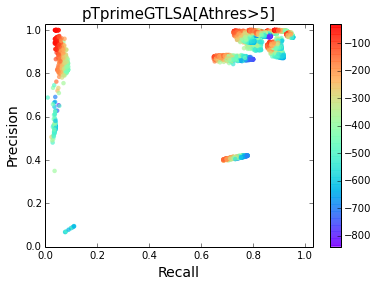

In [89]:
scatterplot(df,"Recall","Precision","pTprimeGTLSA[Athres>5]",bucketize=False)

In [91]:
# for thres in np.arange(-900,0,100):
#     filtered_df = df[df["pTprimeGTLSA[Athres>5]"]>thres]
#     #bucketized_data = bucketize(Q1_filtered_df["Q2[A<10]"],5)
#     #scatterplot(Q1_filtered_df,"Recall","Precision","Q2[A<10]",bucketized_data,bucketize=True)
#     scatterplot(filtered_df,"Recall","Precision","pTprimeGTLSA[Athres>5]",bucketize=False)

In [82]:
def bucketize(data,Nbuckets):
    delta = (max(data)-min(data))/Nbuckets
    bucketized_data = []
    start=0
    end=delta
    for val in data:
        start=0
        end=delta
        #print "val: ",val
        for i in range(Nbuckets+3):
            #print start,end
            if val<=start and i==0:
                bucketized_data.append(0)
                break
            if val>=start and val<end:
                #print"added"
                bucketized_data.append(start)
                break
            else:
                start=end
                end+=delta
            if i==Nbuckets+2:
                bucketized_data.append(end)
    #print len(bucketized_data),len(data)
    assert len(bucketized_data)==len(data)
    return bucketized_data

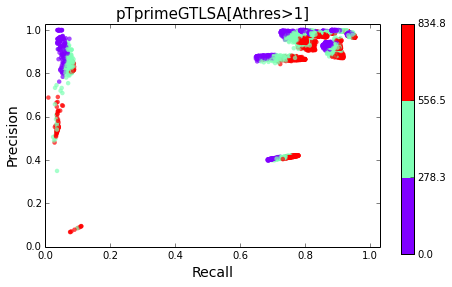

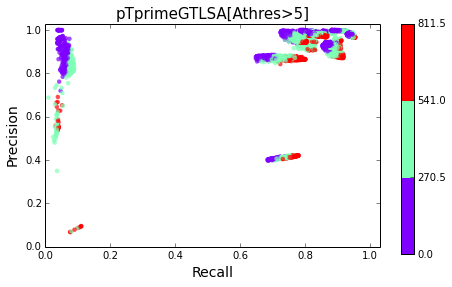

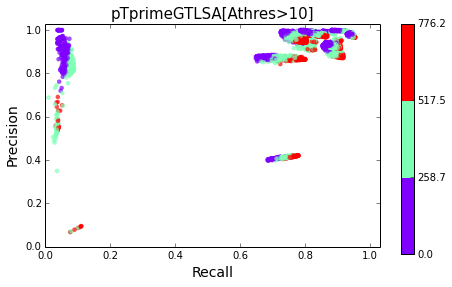

In [93]:
for thres in [1,5,10]:
    z_attr="pTprimeGTLSA[Athres>{}]".format(thres)
    bucketized_data = bucketize(abs(df[z_attr]),3)
    scatterplot(df,"Recall","Precision",z_attr,bucketized_data,bucketize=True)

We can distinguish workers pretty well, purple (highest p(T')) above green above red mostly

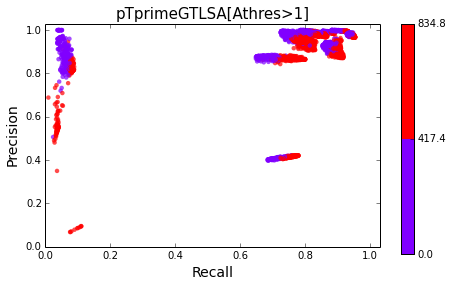

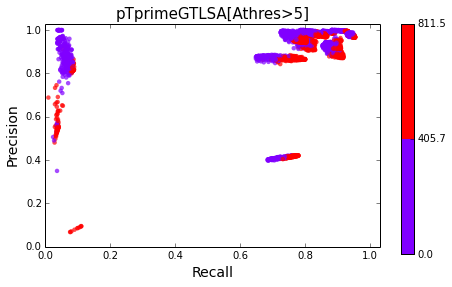

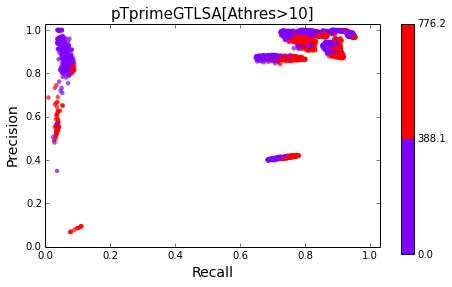

In [94]:
for thres in [1,5,10]:
    z_attr="pTprimeGTLSA[Athres>{}]".format(thres)
    bucketized_data = bucketize(abs(df[z_attr]),2)
    scatterplot(df,"Recall","Precision",z_attr,bucketized_data,bucketize=True)